<a href="https://colab.research.google.com/github/clacri/CASP14_MR_evaluation/blob/main/CASP_ReLLG_Exploration_Results_Prediction_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First setting up steps

# Python imports
import os
import pandas as pd
from IPython.display import display
import numpy
from operator import itemgetter

# Google drive mounting to get the data
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

# Plotting related
import matplotlib.pyplot as plt
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])

Mounted at /content/drive


In [ ]:
# Second setting up step
path_claudia_prediction_tables = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/Prediction_reLLG_tables/"
# There is also information about which structures do have x-ray data
path_data = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/targets_xray.csv"
# And which groups identifiers correspond with wich names
path_groups = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/groups.csv"
output_dir = '/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/'

# Including also the information from Marcus and Joana's runs
path_llgs_prediction = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/df_mr_for_Randy.csv"

# More info about experimental data
path_csv_all_methods = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/target_experiment_types.csv"

# Also list with all the targets to be able to use it to penalise groups who did not submit a target
list_target_evaluation = df_global_methods['Target_Evaluation'].tolist()
print("List target evaluation",list_target_evaluation)

List target evaluation ['T1024-D1', 'T1024-D2', 'T1025-D1', 'T1026-D1', 'T1027-D1', 'T1028-D1', 'T1029-D1', 'T1030-D1', 'T1030-D2', 'T1031-D1', 'T1032-D1', 'T1033-D1', 'T1034-D1', 'T1035-D1', 'T1036s1-D1', 'T1037-D1', 'T1038-D1', 'T1038-D2', 'T1039-D1', 'T1040-D1', 'T1041-D1', 'T1042-D1', 'T1043-D1', 'T1045s1-D1', 'T1045s2-D1', 'T1046s1-D1', 'T1046s2-D1', 'T1047s1-D1', 'T1047s2-D1', 'T1047s2-D2', 'T1047s2-D3', 'T1049-D1', 'T1050-D1', 'T1050-D2', 'T1050-D3', 'T1052-D1', 'T1052-D2', 'T1052-D3', 'T1053-D1', 'T1053-D2', 'T1054-D1', 'T1055-D1', 'T1056-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2', 'T1060s2-D1', 'T1060s3-D1', 'T1061-D1', 'T1061-D2', 'T1061-D3', 'T1064-D1', 'T1065s1-D1', 'T1065s2-D1', 'T1067-D1', 'T1068-D1', 'T1070-D1', 'T1070-D2', 'T1070-D3', 'T1070-D4', 'T1073-D1', 'T1074-D1', 'T1076-D1', 'T1078-D1', 'T1079-D1', 'T1080-D1', 'T1082-D1', 'T1083-D1', 'T1084-D1', 'T1085-D1', 'T1085-D2', 'T1085-D3', 'T1086-D1', 'T1086-D2', 'T1087-D1', 'T1089-D1', 'T1090-D1', 'T1091-D1', 'T1091-D2', 'T

In [ ]:
# Read in extra information

# About availability of x-ray data
df_data_xray = pd.read_csv(path_data, header=None)
df_data_xray.columns = ['Target']
list_xray_full = df_data_xray['Target'].tolist()
list_xray = [ele[1:] for ele in list_xray_full]
print('\nTargets with x-ray data',list_xray)
#display(df_data_xray)

# About availability of cryo-em data
# This info comes from the website https://predictioncenter.org/casp14/cryoem_results.cgi
# On that link there are multiple domains from the targets but I guess the target itself in full has the associated data
# Looking on the site, I found the cryoem targets are: H1036, T1026, T1036, T1092, T1093, T1094, T1095, T1096, T1099
# H1036 is a multimeric target but is the same structure that T1036, a cryoem structure with pdb id 6vn1
list_cryoem = ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']
print('\nTargets with CryoEM data',list_cryoem) 

# About the names of the groups
df_groups_key = pd.read_csv(path_groups,delimiter=';',dtype=str)
df_groups_key.columns = ['Name_Group','Group','Type']
df_groups_key['Group'] = df_groups_key['Group'].astype(str)
del df_groups_key['Type']
#display(df_groups_key)
groupnames_dict = dict(zip(df_groups_key['Group'], df_groups_key['Name_Group']))
print("\nGroup names and numbers correspondence",groupnames_dict)


# Master csv with all info now
df_global_methods= pd.read_csv(path_csv_all_methods,delimiter=',',dtype=str, header=None)
df_global_methods.columns = ['Target_Evaluation','Experimental_Method']
display(df_global_methods)

# Also list with all the targets to be able to use it to penalise groups who did not submit a target
list_target_evaluation = df_global_methods['Target_Evaluation'].tolist()
print("List target evaluation",list_target_evaluation)

display(df_groups_key)


Targets with x-ray data ['1024', '1030', '1031', '1033 ', '1035', '1037', '1039', '1040', '1041', '1042', '1042', '1043', '1032', '1034', '1038', '1046', '1048', '1049', '1050', '1052', '1053', '1054', '1056', '1058', '1064', '1065', '1067', '1070', '1073', '1074', '1079', '1080', '1082', '1083', '1084', '1085', '1086', '1087', '1089', '1090', '1091', '1100', '1101']

Targets with CryoEM data ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']

Group names and numbers correspondence {'000': 'VoroMQA-stout', '002': 'VoroMQA-dark', '003': 'SHORTLE', '004': 'GAPF_LNCC', '005': 'Seder2020', '006': 'BrainFold', '009': 'tFold_human', '010': 'TripletRes', '013': 'FEIG-S', '014': 'xianmingpan', '015': 'AP_1', '018': 'UNRES-template', '024': 'DeepPotential', '026': 'NOVA', '027': 'SSThread', '029': 'Venclovas', '031': 'Zhang-CEthreader', '032': 'MESHI', '033': 'ishidalab', '035': 'ModFOLDclust2', '039': 'ropius0QA', '042': 'QUARK', '044': 'DeepML', '050': 'IntFOLD6', '052': 'GAPF_

,Target_Evaluation,Experimental_Method
0,T1024-D1,X-ray
1,T1024-D2,X-ray
2,T1025-D1,X-ray
3,T1026-D1,Cryo-EM
4,T1027-D1,NMR
...,...,...
91,T1099-D1,Cryo-EM
92,T1100-D1,X-ray
93,T1100-D2,X-ray
94,T1101-D1,X-ray


List target evaluation ['T1024-D1', 'T1024-D2', 'T1025-D1', 'T1026-D1', 'T1027-D1', 'T1028-D1', 'T1029-D1', 'T1030-D1', 'T1030-D2', 'T1031-D1', 'T1032-D1', 'T1033-D1', 'T1034-D1', 'T1035-D1', 'T1036s1-D1', 'T1037-D1', 'T1038-D1', 'T1038-D2', 'T1039-D1', 'T1040-D1', 'T1041-D1', 'T1042-D1', 'T1043-D1', 'T1045s1-D1', 'T1045s2-D1', 'T1046s1-D1', 'T1046s2-D1', 'T1047s1-D1', 'T1047s2-D1', 'T1047s2-D2', 'T1047s2-D3', 'T1049-D1', 'T1050-D1', 'T1050-D2', 'T1050-D3', 'T1052-D1', 'T1052-D2', 'T1052-D3', 'T1053-D1', 'T1053-D2', 'T1054-D1', 'T1055-D1', 'T1056-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2', 'T1060s2-D1', 'T1060s3-D1', 'T1061-D1', 'T1061-D2', 'T1061-D3', 'T1064-D1', 'T1065s1-D1', 'T1065s2-D1', 'T1067-D1', 'T1068-D1', 'T1070-D1', 'T1070-D2', 'T1070-D3', 'T1070-D4', 'T1073-D1', 'T1074-D1', 'T1076-D1', 'T1078-D1', 'T1079-D1', 'T1080-D1', 'T1082-D1', 'T1083-D1', 'T1084-D1', 'T1085-D1', 'T1085-D2', 'T1085-D3', 'T1086-D1', 'T1086-D2', 'T1087-D1', 'T1089-D1', 'T1090-D1', 'T1091-D1', 'T1091-D2', 'T

,Name_Group,Group
0,VoroMQA-stout,000
1,VoroMQA-dark,002
2,SHORTLE,003
3,GAPF_LNCC,004
4,Seder2020,005
...,...,...
210,RaptorX,487
211,tFold-IDT_human,488
212,Seok-naive_assembly,491
213,VoroMQA-select,498


In [ ]:
# Function definitions (to avoid whenever possible code duplication)

def compute_ranking_and_plot(dataf,column_name,stat,filter_negative=False):
  if stat=='mean':
    rank = dataf.groupby(['Name_Group'])[column_name].mean()
  elif stat=='sum':
    rank = dataf.groupby(['Name_Group'])[column_name].sum()
  elif stat=='median':
    rank = dataf.groupby(['Name_Group'])[column_name].median()
  # We then sort the rank
  rank.sort_values(inplace=True,ascending=False)
  if filter_negative:
    rank = rank[rank>=0]
  # Now do the plot
  plot = rank.plot.bar(width=0.8, color="cornflowerblue")
  #print("Ranking according to: "+stat+' '+column_name+" for each group")
  #print(rank)
  #plot.set_title(stat+' '+column_name+' for each group')
  plot.set_ylabel(stat+' '+column_name)
  #plot.figure.savefig("prediction_ranking_"+stat+'_'+column_name+".png",bbox_inches = "tight")
  #files.download("prediction_ranking_"+stat+'_'+column_name+".png") # This will download it
  return rank, plot


def get_list_color_ref(indices_rank,skip_fac=1):
  list_colour=[]
  for groupi in indices_rank.index:
    if groupi== '---STARTING-MODEL---':
      list_colour.append('C0')
    else:
      list_colour.append('C'+str(skip_fac))
  return list_colour

def merge_group_and_experimental_info(global_dataframe,list_xray, list_em, df_global_methods, df_groups_key):
  # Include the name of the group
  global_dataframe_merged = pd.merge(global_dataframe,df_groups_key,on="Group")
  # Also include info about x-ray experimental data
  global_dataframe_merged['Has_Xray_Data'] = global_dataframe_merged['Target'].isin(list_xray)
  # And about cryoEM
  global_dataframe_merged['Has_EM_Data'] = global_dataframe_merged['Target'].isin(list_em)
  # Finally add column about the experimental method
  global_dataframe_final = pd.merge(global_dataframe_merged,df_global_methods,on='Target_Evaluation')
  #global_dataframe_merged['Experimental_Method'] = numpy.where(global_dataframe_merged['Has_Xray_Data']==True, 'xray','undefined')
  #global_dataframe_merged.loc[global_dataframe_merged.Has_EM_Data == True, "Experimental_Method"] = "em"
  return global_dataframe_final

def read_single_target_dataframe_and_prepare(path_table,treatment,metric,remove_not_considered_metric=True):
  df = pd.read_csv(path_table)
  # Prepare dataframe for analysis
  # Remove white spaces in titles
  df.rename(columns=str.strip, inplace=True)
  # Remove the .pdb extension
  df['Model'] = df['Model'].str.replace(r'.pdb', '')
  df['Model'] = df['Model'].str.strip()
  for column in list(df.columns):
    if column=="Model":
      continue
    # Drop the columns we are not interested in looking this time unless set to be kept
    if remove_not_considered_metric:
      if (not column.endswith(treatment) or not column.startswith(metric)):
        if not column == 'status_'+treatment:
            del df[column]
  #display(df)
  # Include a column with the name of the group
  # Include a column with the name of the target
  # NOTE: I am sure there are better ways to do this. Also I will need to adapt to the different naming issues in Casp
  new = df["Model"].str.split("TS", n = 1, expand = True)
  #print("SHERLOCK new[0]",new[0]) # this is target name, we will have to combine with domain
  new_two = new[1].str.split("-",n=0,expand=True)
  df["Target_Evaluation"] = new[0]+'-'+new_two[1]
  df["Target"] = df["Target_Evaluation"].str[1:5]
  new = df["Model"].str.split("_", n = 1, expand = True)
  new_two = new[1].str.split("-",n=0,expand=True)
  df['Self_rank'] = new_two[0].str.strip()
  new_group = new[0].str.split("TS",n = 1, expand = True)
  df["Group"]= new_group[1]
  return df.copy()
  
def process_target_dataframe(df, column_name):
    # For the mean and std calculations we need to ignore group TS999
    df_filtered = df[df.Group != '999' ]
    # but we will keep it somewhere else
    #df_reference = df[df.Group == '999' ]
    #display(df_filtered)
    #display(df_reference)
    # First do it for the as_rmsd option, compute mean and sd
    mean_val = df_filtered[column_name].mean() 
    #print("Mean value for ",column_name, " is ", mean_val)
    std_val = df_filtered[column_name].std()
    #print("Standard deviation value for ", column_name," is ", std_val)
    # Zscore 
    # The formula for calculating a z-score is is z = (x-μ)/σ
    # where x is the raw score, μ is the population mean, and σ is the population standard deviation. 
    # For the zscore we use the full one (includes group 999 but it was not used for mean and std)
    df[column_name+'_zscore'] = (df[column_name] - mean_val)/std_val
    # Remove all models with a value of this zscore worse than -2 
    size_before = len(df)
    df_filt_minus2 = df[df[column_name+'_zscore'] > -2] 
    size_after = len(df_filt_minus2)
    #print("\n SHERLOCK before")
    #display(df)
    if size_after < size_before:
      # Then I need to do a second round of computation with the filtered dataset
      # Now we will use the filtered one to recompute the mean, std, and of course zscore
      mean_val_filt = df_filt_minus2[column_name].mean() 
      #print("Mean value for ",column_name, " is ", mean_val)
      std_val_filt = df_filt_minus2[column_name].std()
      del df[column_name+'_zscore'] # we will remove it and regenerate it again after the filtering
      df[column_name+'_zscore'] = (df[column_name] - mean_val_filt)/std_val_filt
      #print("\n SHERLOCK after")
      #display(df)
    return df.copy(), mean_val, std_val

def process_all_targets(path_tables,treatment,metric,read_all=False,error_check=False):
  # We will need a larger dataframe that will be constructed by adding the processed ones for each target
  # so we will save the individual ones in a list
  list_dataframes = []
  # Now iterate over all the csv tables (each one is a target)
  for fichi in os.listdir(path_tables):
     if fichi.endswith('.csv'):
        fullpathfichi = os.path.join(path_tables,fichi)
        # Read and processed csv
        if read_all:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric,remove_not_considered_metric=False)
          # Now compute for each column of the metric the first round of zscore, using mean and std
          for col in df_target.columns:
            if col.startswith('reLLG') and not col.endswith('zscore'):
              #print("\n Analysing ",col)
              df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,col)
              list_dataframes.append(df_target_with_zscores_first)
        else:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric)
          # Now compute first round of zscore, using mean and std
          keyword_metric = metric+'_'+treatment
          df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,keyword_metric)
          list_dataframes.append(df_target_with_zscores_first)
          if error_check:
            print("\n\n Processing table ",fichi)
            try:
              display(df_target['status_'+treatment].value_counts())
              #print("Errors about pdb formatting and extension compared to target found:  ")
              #display(df_target.loc[df_target['status_'+treatment] == -3])
              #print("Errors about random coil in tng found :  ")
              #display(df_target.loc[df_target['status_'+treatment] == -2])
              #print("Errors about too large model in tng found :  ")
              #display(df_target.loc[df_target['status_'+treatment] == -1])
            except:
              pass
          #print("SHERLOCK exit",1/0)
          # NOTE: Maybe it is worth exploring how the values look like for a single target
          # But careful, too many figures might be hard on the memory
          #df_target.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_'+fichi[:-16])

  # Concat will join them by their rows, and produce a single dataframe containing the results for all targets
  df_all_targets = pd.concat(list_dataframes,axis=0,ignore_index=True)
  return df_all_targets

In [ ]:
# Sanity check we will be looking at the error's codes
# -1 for the very large model message error in phasertng (considers a factor of two times the cell of the target)
# -2 for the random coil error message in phasertng
# -3 for the PDB formatting errors or not passing the test of being more extended than 80 å in any direction from the target dimensions in x,y,z
#df_all_targets_as_rmsd = process_all_targets(path_claudia_prediction_tables,treatment='as_rmsd',metric='reLLG',error_check=True)
#display(df_all_targets_as_rmsd)  

In [ ]:
# Now read and process all of our targets with the as_rmsd_treatment
df_all_targets_as_rmsd = process_all_targets(path_claudia_prediction_tables,treatment='as_rmsd',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_as_rmsd = merge_group_and_experimental_info(df_all_targets_as_rmsd,list_xray,list_cryoem,df_global_methods,df_groups_key)
# This dataframe contains all information for all models
display(df_all_as_rmsd)

,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.015876,0,T1035-D1,1035,1,003,0.239764,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.000072,0,T1035-D1,1035,1,005,-0.411299,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.000062,0,T1035-D1,1035,2,005,-0.411698,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.000047,0,T1035-D1,1035,3,005,-0.412315,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.000049,0,T1035-D1,1035,4,005,-0.412245,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.636018,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,0.864269,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015287,0,T1036s1-D1,1036,3,451,0.533457,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,1.837547,Seok-assembly,False,True,Cryo-EM


In [ ]:
#Just checking the different plotting styles
#for style in plt.style.available:
#    print(" This style is called ",style)
#    plt.style.use(style)
    # Note this histogram has all single instances of pairs of targets/models for all groups
#    histogram_all_as_rmsd = df_all_as_rmsd.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_all_targets_and_models_prediction',bins=24)
 #   histogram_all_as_rmsd.figure.savefig("reLLG_as_rmsd_zscore_all_targets_and_models_prediction.png")
 #   plt.show()
    # This will download it
    #files.download("reLLG_as_rmsd_zscore_all_targets_and_models_prediction.png") 

In [ ]:
# Now read and process all of our targets with the as_bfactors treatment
# We just want to look at this as a curiosity, as in the past we have seen groups submitting bfactors instead of rmsd error estimations
# The only thing for what we might want this data for is to see if any group performed better with this treatment than with the others
df_all_targets_as_bfactors = process_all_targets(path_claudia_prediction_tables,treatment='as_bfactor',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_as_bfactors = merge_group_and_experimental_info(df_all_targets_as_bfactors,list_xray,list_cryoem,df_global_methods,df_groups_key)
display(df_all_as_bfactors)

,Model,reLLG_as_bfactor,status_as_bfactor,Target_Evaluation,Target,Self_rank,Group,reLLG_as_bfactor_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.016292,0,T1035-D1,1035,1,003,0.271964,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.013178,0,T1035-D1,1035,1,005,0.140090,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.014302,0,T1035-D1,1035,2,005,0.187670,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.014700,0,T1035-D1,1035,3,005,0.204554,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.014258,0,T1035-D1,1035,4,005,0.185827,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.691610,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,0.928957,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015286,0,T1036s1-D1,1036,3,451,0.584836,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,1.941123,Seok-assembly,False,True,Cryo-EM


In [ ]:
# Now read and process all of our targets with the constant bfactor treatment
# This one can be helpful to compare the raw coordinate correctness with the estimation of the error
df_all_targets_constantb = process_all_targets(path_claudia_prediction_tables,treatment='bfactor_constant',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_bfact_constant = merge_group_and_experimental_info(df_all_targets_constantb,list_xray,list_cryoem,df_global_methods,df_groups_key)
display(df_all_bfact_constant)

,Model,reLLG_bfactor_constant,status_bfactor_constant,Target_Evaluation,Target,Self_rank,Group,reLLG_bfactor_constant_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.016306,0,T1035-D1,1035,1,003,0.295163,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.011741,0,T1035-D1,1035,1,005,0.095120,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.012332,0,T1035-D1,1035,2,005,0.121019,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.012663,0,T1035-D1,1035,3,005,0.135527,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.012382,0,T1035-D1,1035,4,005,0.123180,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.759461,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,1.009311,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015286,0,T1036s1-D1,1036,3,451,0.647116,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,2.074711,Seok-assembly,False,True,Cryo-EM


In [ ]:
# We check the number of targets predicted by the groups to see which ones we will consider for the ranking
total_targets = len(df_all_as_rmsd['Target_Evaluation'].unique())
print("\nNumber of unique targets is ",total_targets)
total_groups = len(df_all_as_rmsd['Name_Group'].unique())
print("\nNumber of unique groups is ",total_groups)
print("\nThreshold for group consideration is ",(total_targets*2)/3)
# Consider only the model 1 
df_mod1_as_rmsd = df_all_as_rmsd[df_all_as_rmsd['Self_rank']== '1']

rank_models_evaluated = df_mod1_as_rmsd.groupby(['Name_Group'])['Target_Evaluation'].count()
rank_models_evaluated.sort_values(inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # This trick is to avoid the output data series to be truncated
#    print(rank_models_evaluated)
#rank_models_evaluated.plot.bar(color=list_colour,figsize=(40,10))
groups_to_eliminate = rank_models_evaluated.loc[rank_models_evaluated<64]
list_to_eliminate = list(groups_to_eliminate.index)
print('\n Groups to eliminate',list_to_eliminate)
#print(len(list_to_eliminate))


Number of unique targets is  96

Number of unique groups is  146

Threshold for group consideration is  64.0

 Groups to eliminate ['ict-ams', 'PBuild', 'Elofsson', 'PerezLab_Gators', 'DMP2', 'trioFold', 'bioinsilico_sbi', 'ishidalab', 'SHORTLE', 'Seok-assembly', 'MESHI_server', 'Vakser', 'Takeda-Shitaka-Lab', 'Huang', 'laufer_ros', 'Venclovas', 'ferrari', 'LamoureuxLab', 'Seok-naive_assembly', 'ricardo', 'ShanghaiTech', 'Kiharalab_Assembly', 'Zou', 'Fernandez-Recio', 'CoDock', 'PierceLab', 'MULTICOM-AI', 'edmc_pf', 'Kozakov-Vajda', 'CAPRI-Shen', 'CLUSPRO', 'Zhang-Assembly', 'htjcadd', 'GAPF_LNCC', 'SSThread', 'm3g', 'FALCON', 'Zhanglab_SLU', 'YBA', 'FOLDYNE', 'SFGroup']


In [ ]:
# Analysis of specific targets of interest to compare LLG values to the new metric, the reLLG
# First read the info about LLG from Marcus and Joana file
df_llg_data = pd.read_csv(path_llgs_prediction)
new = df_llg_data["Model"].str.split("TS", n = 1, expand = True)
#print("SHERLOCK new[0]",new[0]) # this is target name, we will have to combine with domain
new_two = new[1].str.split("-",n=0,expand=True)
df_llg_data["Target_Evaluation"] = new[0]+'-'+new_two[1]
df_llg_data["Target"] = df_llg_data["Target_Evaluation"].str[1:5]
display(df_llg_data)
print("Unique values are ",df_llg_data["Target_Evaluation"].unique())
print("Unique values are ",len(df_llg_data["Target_Evaluation"].unique()))
print("Unique values are ",df_llg_data["Target"].unique())
print("Unique values are ",len(df_llg_data["Target"].unique()))

# Just some checks but it is normal as they only had certain structures with data to compute LLG
#print("Size of their data",len(df_llg_data))
#print("Size of our original data",len(df_all_as_rmsd))
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
#print("Size of our filtered data",len(df_all_as_rmsd_groupdel))




,Model,GDT_TS,GDT_HA,Z_GDT_TS,Z_GDT_HA,LLG_Original_deltaLLG,LLG_B_from_rms_deltaLLG,LLG_const_B_deltaLLG,Z_LLG_Original_deltaLLG,Z_LLG_B_from_rms_deltaLLG,Z_LLG_const_B_deltaLLG,Target_Evaluation,Target
0,T1024TS004_1-D1,68.65,46.50,0.000000,0.000000,175.219602,164.177461,167.537586,-0.585503,-0.340391,-0.571214,T1024-D1,1024
1,T1024TS004_2-D1,68.65,46.50,0.000000,0.000000,175.182059,164.273724,167.704973,-0.585781,-0.339849,-0.569967,T1024-D1,1024
2,T1024TS004_3-D1,68.65,46.50,0.000000,0.000000,175.218356,164.044239,167.576294,-0.585512,-0.341141,-0.570926,T1024-D1,1024
3,T1024TS004_4-D1,68.91,46.76,0.000000,0.000000,169.120924,159.369703,161.234755,-0.630628,-0.367460,-0.618156,T1024-D1,1024
4,T1024TS004_5-D1,68.91,46.76,0.000000,0.000000,168.996997,159.536455,161.299503,-0.631545,-0.366521,-0.617674,T1024-D1,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,T1101TS498_1-D2,71.85,50.23,1.070485,0.954950,63.300035,72.736329,61.155781,0.151060,0.106940,0.152250,T1101-D2,1101
28378,T1101TS498_2-D2,65.77,44.74,0.345518,0.289246,16.029508,40.568570,15.368236,-0.168422,-0.052290,-0.166664,T1101-D2,1101
28379,T1101TS498_3-D2,65.30,44.39,0.289476,0.246806,41.374411,43.677593,39.657606,0.002874,-0.036901,0.002513,T1101-D2,1101
28380,T1101TS498_4-D2,69.51,48.72,0.791468,0.771851,78.586424,96.019468,76.521160,0.254375,0.222191,0.259271,T1101-D2,1101


Unique values are  ['T1024-D1' 'T1024-D2' 'T1030-D1' 'T1030-D2' 'T1032-D1' 'T1034-D1'
 'T1038-D1' 'T1038-D2' 'T1046s1-D1' 'T1046s2-D1' 'T1049-D1' 'T1050-D1'
 'T1050-D2' 'T1050-D3' 'T1052-D1' 'T1052-D2' 'T1052-D3' 'T1053-D1'
 'T1053-D2' 'T1054-D1' 'T1056-D1' 'T1058-D1' 'T1058-D2' 'T1064-D1'
 'T1065s1-D1' 'T1065s2-D1' 'T1067-D1' 'T1070-D1' 'T1070-D2' 'T1070-D3'
 'T1070-D4' 'T1073-D1' 'T1074-D1' 'T1079-D1' 'T1080-D1' 'T1082-D1'
 'T1083-D1' 'T1084-D1' 'T1085-D1' 'T1085-D2' 'T1085-D3' 'T1086-D1'
 'T1086-D2' 'T1087-D1' 'T1089-D1' 'T1090-D1' 'T1091-D1' 'T1091-D2'
 'T1091-D3' 'T1091-D4' 'T1100-D1' 'T1100-D2' 'T1101-D1' 'T1101-D2']
Unique values are  54
Unique values are  ['1024' '1030' '1032' '1034' '1038' '1046' '1049' '1050' '1052' '1053'
 '1054' '1056' '1058' '1064' '1065' '1067' '1070' '1073' '1074' '1079'
 '1080' '1082' '1083' '1084' '1085' '1086' '1087' '1089' '1090' '1091'
 '1100' '1101']
Unique values are  32


,Model,GDT_TS,GDT_HA,Z_GDT_TS,Z_GDT_HA,LLG_Original_deltaLLG,LLG_B_from_rms_deltaLLG,LLG_const_B_deltaLLG,Z_LLG_Original_deltaLLG,Z_LLG_B_from_rms_deltaLLG,Z_LLG_const_B_deltaLLG,Target_Evaluation,Target
21436,T1085TS005_1-D3,72.81,51.76,0.000000,0.000000,44.922733,0.000000,33.951284,-0.234077,-0.851414,-0.327038,T1085-D3,1085
21437,T1085TS005_2-D3,77.19,57.90,0.246413,0.168371,66.771753,0.000000,52.923085,0.634587,-0.851414,0.436444,T1085-D3,1085
21438,T1085TS005_3-D3,76.75,57.46,0.209861,0.133590,61.424947,0.000000,47.164688,0.422011,-0.851414,0.204709,T1085-D3,1085
21439,T1085TS005_4-D3,76.75,57.46,0.209861,0.133590,59.911442,0.000000,47.087084,0.361838,-0.851414,0.201586,T1085-D3,1085
21440,T1085TS005_5-D3,77.19,57.90,0.246413,0.168371,60.303791,0.000000,47.764668,0.377437,-0.851414,0.228854,T1085-D3,1085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,T1085TS498_1-D3,81.14,63.60,0.574550,0.618935,81.811393,51.488301,72.711808,1.232527,0.927038,1.232802,T1085-D3,1085
21911,T1085TS498_2-D3,83.33,67.54,0.756479,0.930378,78.838818,45.981888,70.314448,1.114344,0.736841,1.136325,T1085-D3,1085
21912,T1085TS498_3-D3,82.89,64.91,0.719927,0.722486,76.833465,45.972639,68.289985,1.034616,0.736522,1.054855,T1085-D3,1085
21913,T1085TS498_4-D3,83.77,67.98,0.793031,0.965158,90.092286,34.513114,81.101586,1.561755,0.340700,1.570432,T1085-D3,1085


Text(0, 0.5, 'reLLG average per group')

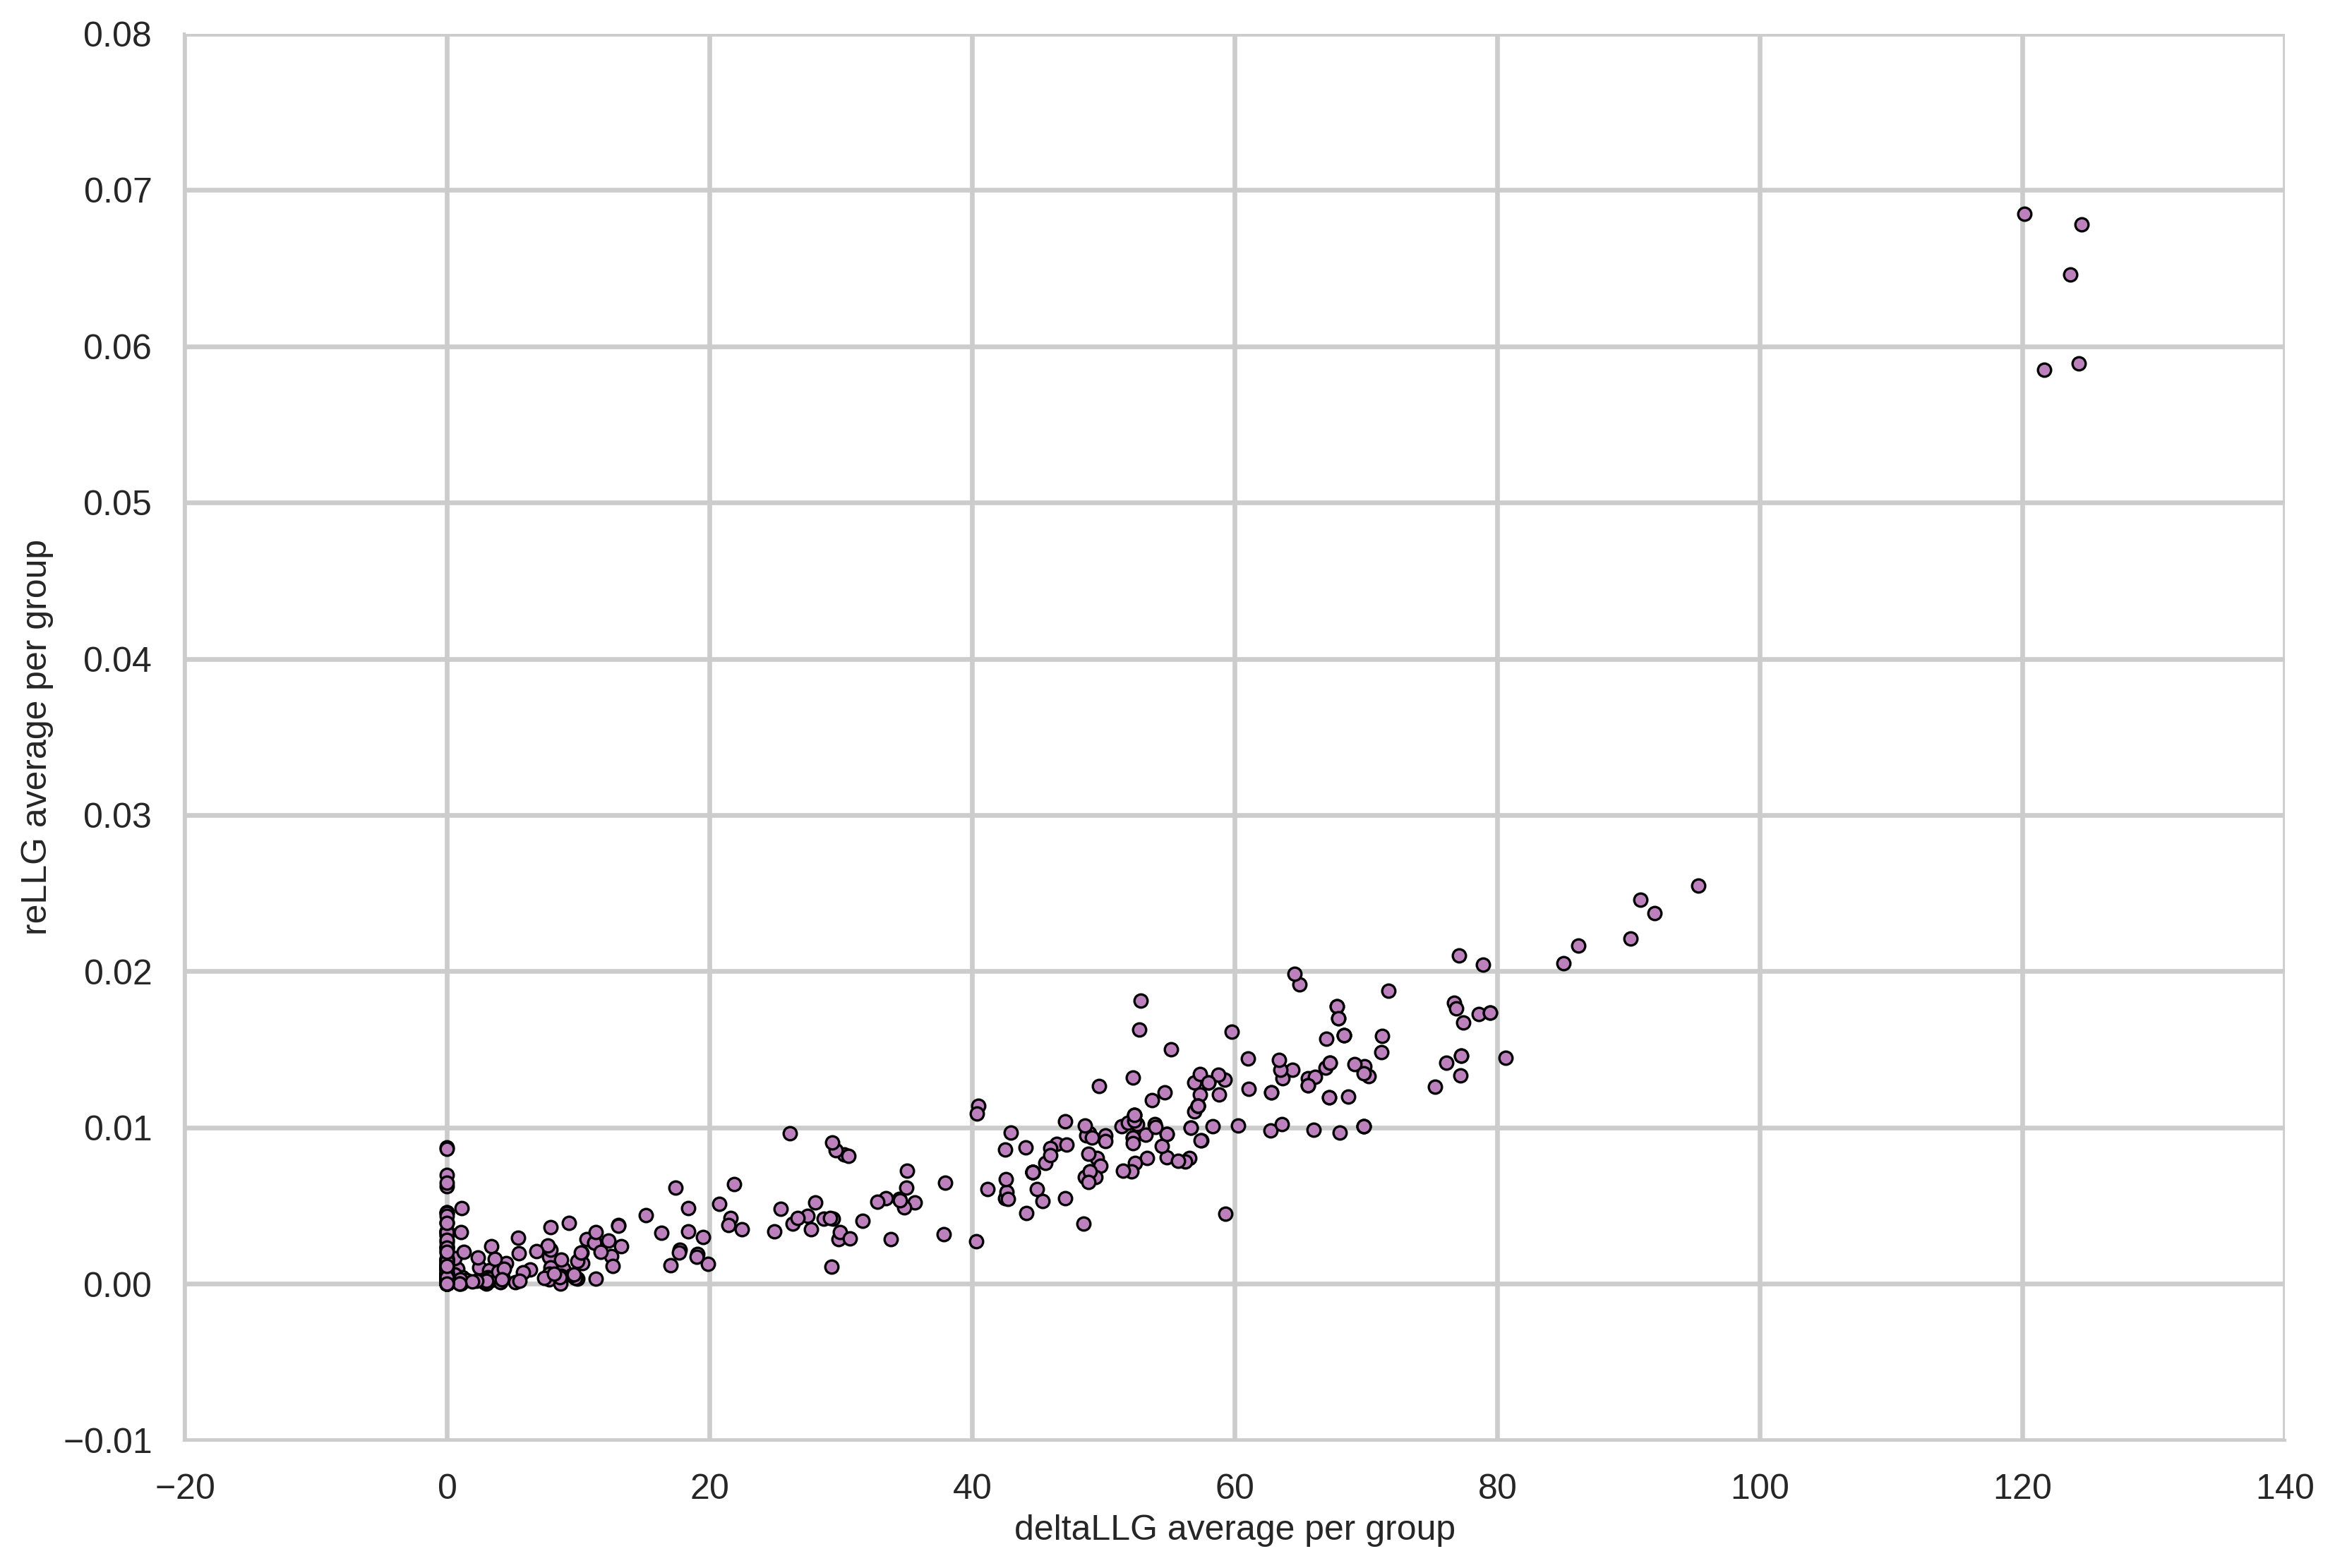

In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1085-D3  TBM-hard and 1/10 of structure.
subset_llg_t1085 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1085') & df_llg_data['Model'].str.endswith('D3')]
display(subset_llg_t1085)

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1085= df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1085') & df_all_bfact_constant['Model'].str.endswith('D3')]
#display(subset_bcons_t1085)
#print("Size subset bcons",len(subset_bcons_t1085))
#merge_for_scatter_bcons_t1085 = pd.merge(subset_llg_t1085,subset_bcons_t1085)
#display(merge_for_scatter_bcons_t1085)
#print("size of merge ",merge_for_scatter_bcons_t1085)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#plotted_bcons = merge_for_scatter_bcons_t1085.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")

# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1085 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1085') & df_all_as_rmsd['Model'].str.endswith('D3')]
#display(subset_as_rmsd_t1085)
#print("Size subset as rmsd",len(subset_as_rmsd_t1085))
merge_for_scatter_as_rmsd_t1085 = pd.merge(subset_llg_t1085,subset_as_rmsd_t1085)
#display(merge_for_scatter_as_rmsd_t1085)
#print("size of merge ",len(merge_for_scatter_as_rmsd_t1085))
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1085.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")



Text(0, 0.5, 'reLLG average per group')

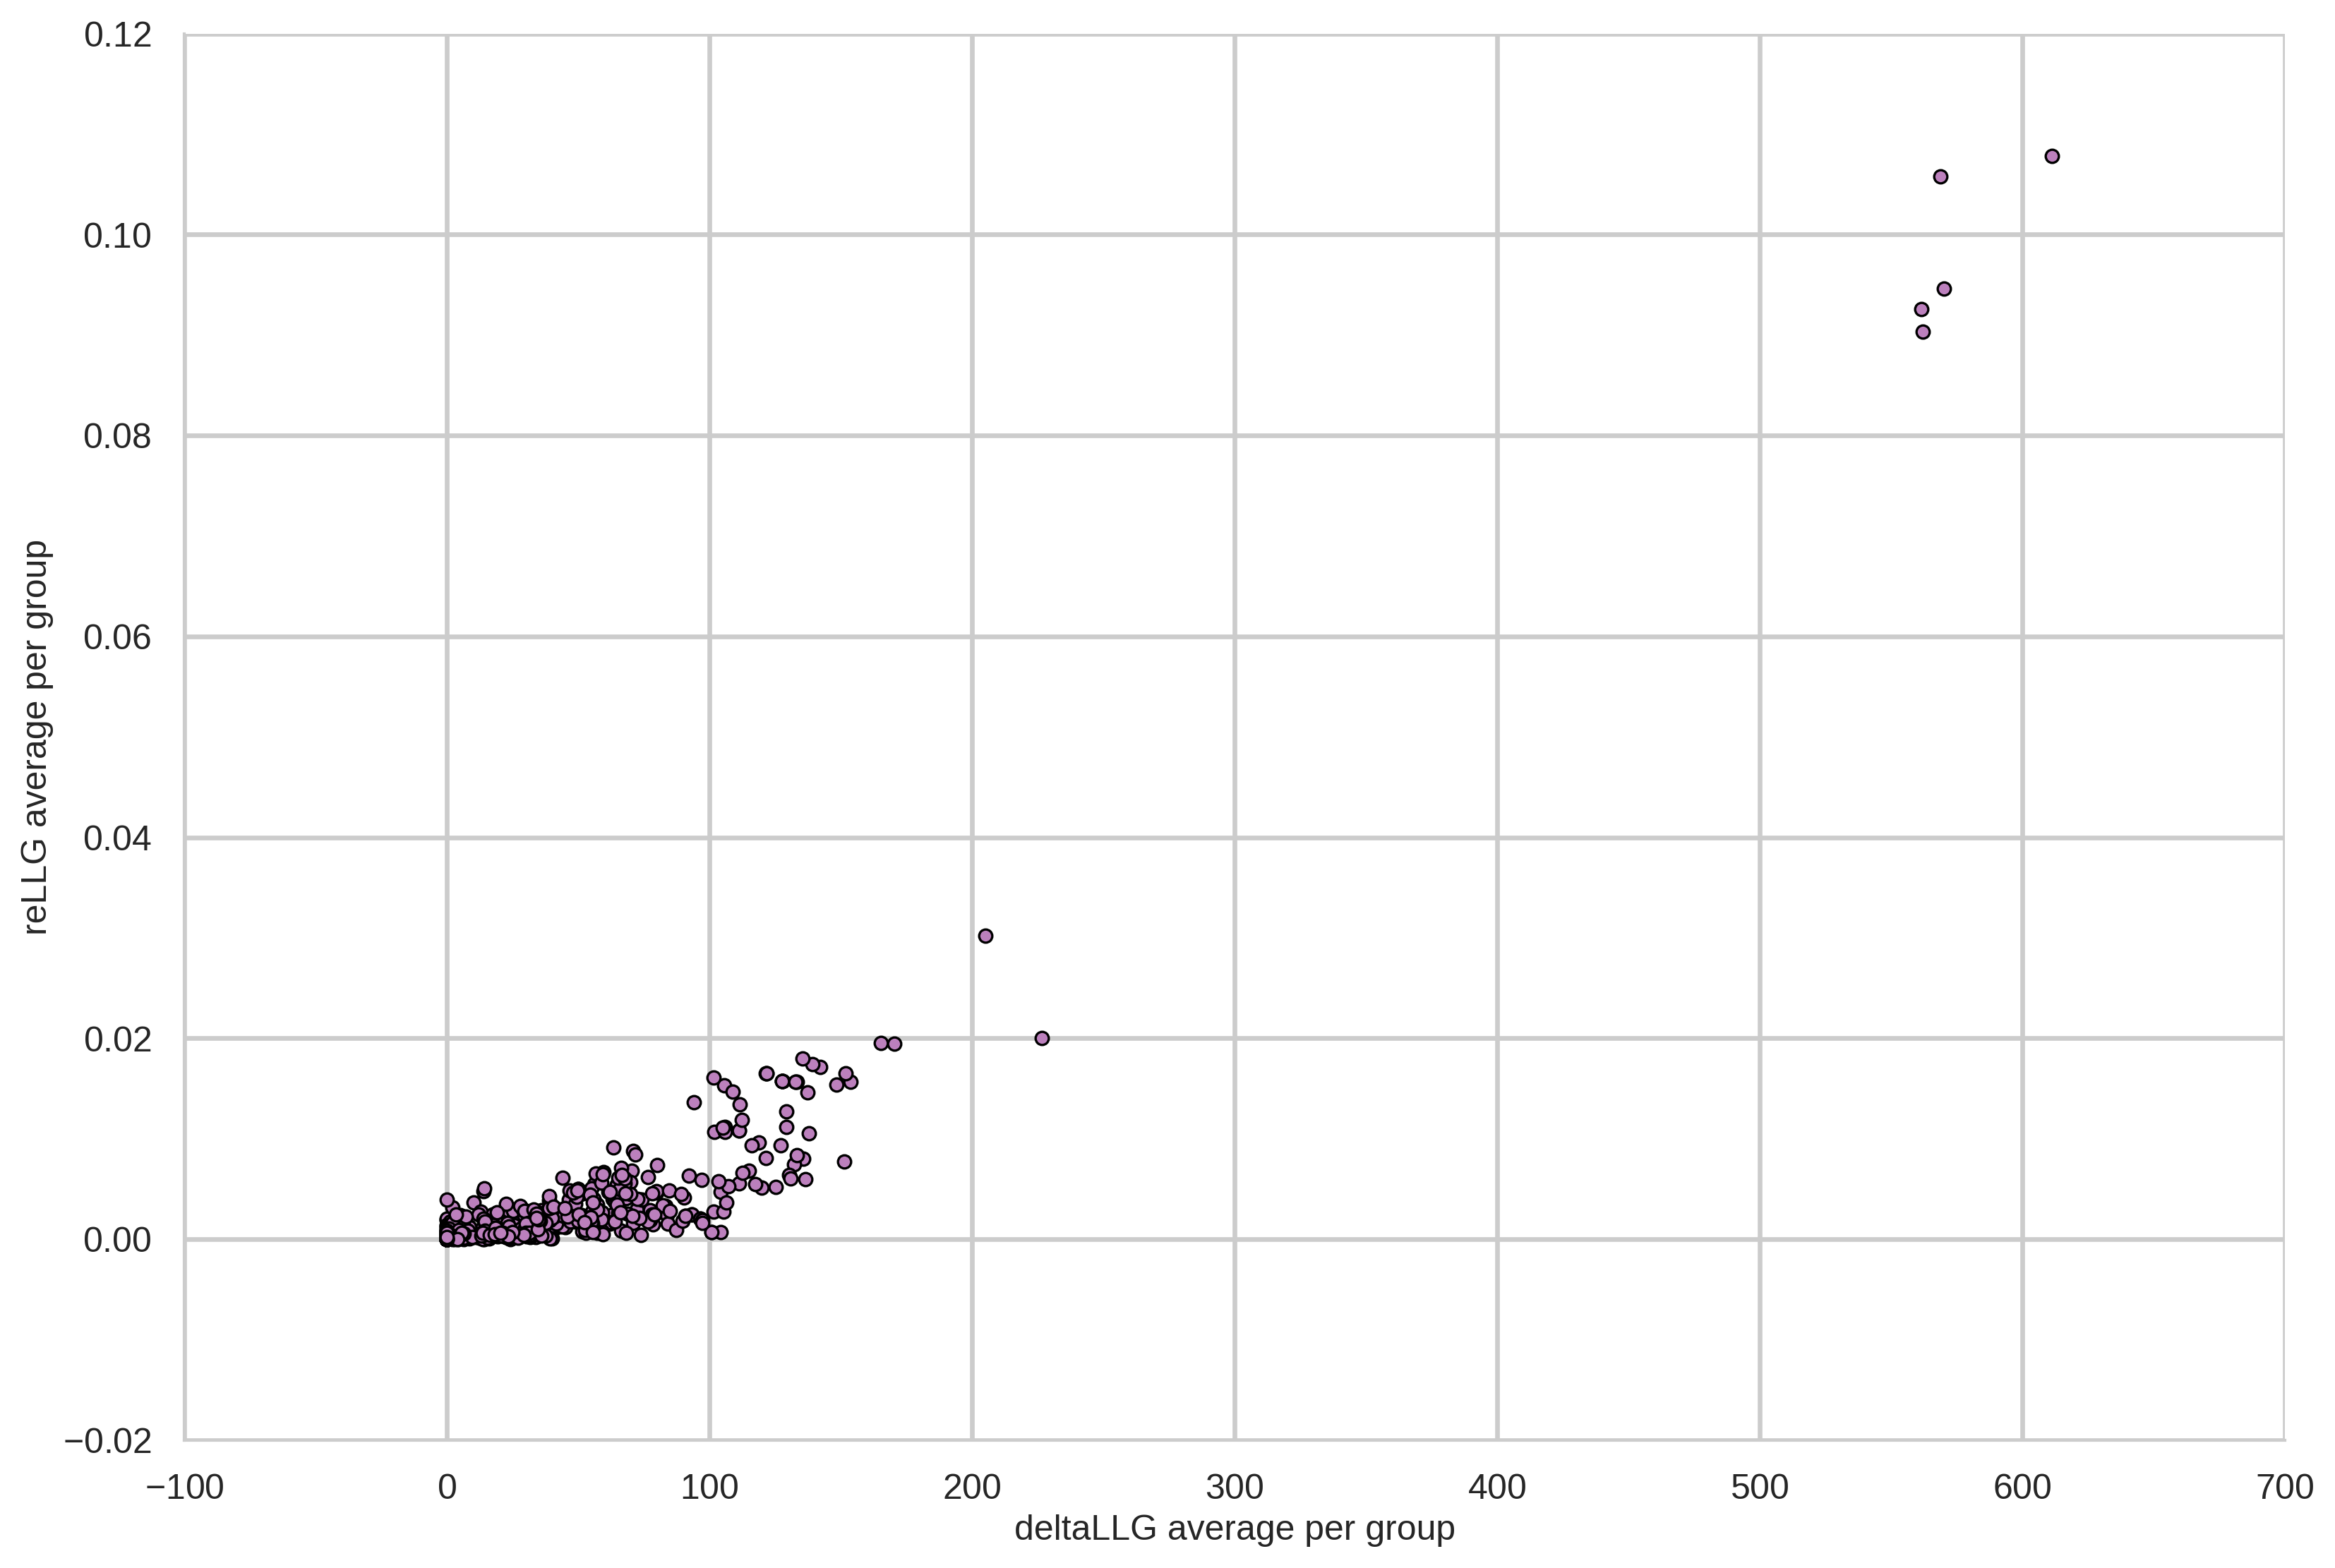

In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
################################################################
# Analysis of specific targets of interest                    #
# T1032-D1:  TBM-hard case, 6 copies in a.u., data to 3.3 Å   #
###############################################################

# df_llg_data
subset_llg_t1032 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1032') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1032)
#print("Size subset llg",len(subset_llg_t1032))
#path_table_llg_1032 =  os.path.join(output_dir,'table_llg_1032.csv')
#subset_llg_t1032.to_csv(path_table_llg_1032)
#files.download(path_table_llg_1032)

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1032 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1032') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1032)
#print("Size subset bcons",len(subset_bcons_t1032))
##path_table_rellg_1032 =  os.path.join(output_dir,'table_rellg_1032.csv')
#subset_bcons_t1032.to_csv(path_table_rellg_1032)
#files.download(path_table_rellg_1032)
#merge_for_scatter_bcons_t1032 = pd.merge(subset_llg_t1032,subset_bcons_t1032)
#display(merge_for_scatter_bcons_t1032)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#print("size of merge ",merge_for_scatter_bcons_t1032)
#plotted_bcons = merge_for_scatter_bcons_t1032.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")



# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1032 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1032') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1032)
#print("Size subset as rmsd",len(subset_as_rmsd_t1032))

merge_for_scatter_as_rmsd_t1032 = pd.merge(subset_llg_t1032,subset_as_rmsd_t1032)
#display(merge_for_scatter_as_rmsd_t1032)
#print("size of merge ",len(merge_for_scatter_as_rmsd_t1032))

# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_as_rmsd = merge_for_scatter_as_rmsd_t1032.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_as_rmsd.set_xlabel("deltaLLG average per group")
plotted_as_rmsd.set_ylabel("reLLG average per group")

Text(0, 0.5, 'reLLG average per group')

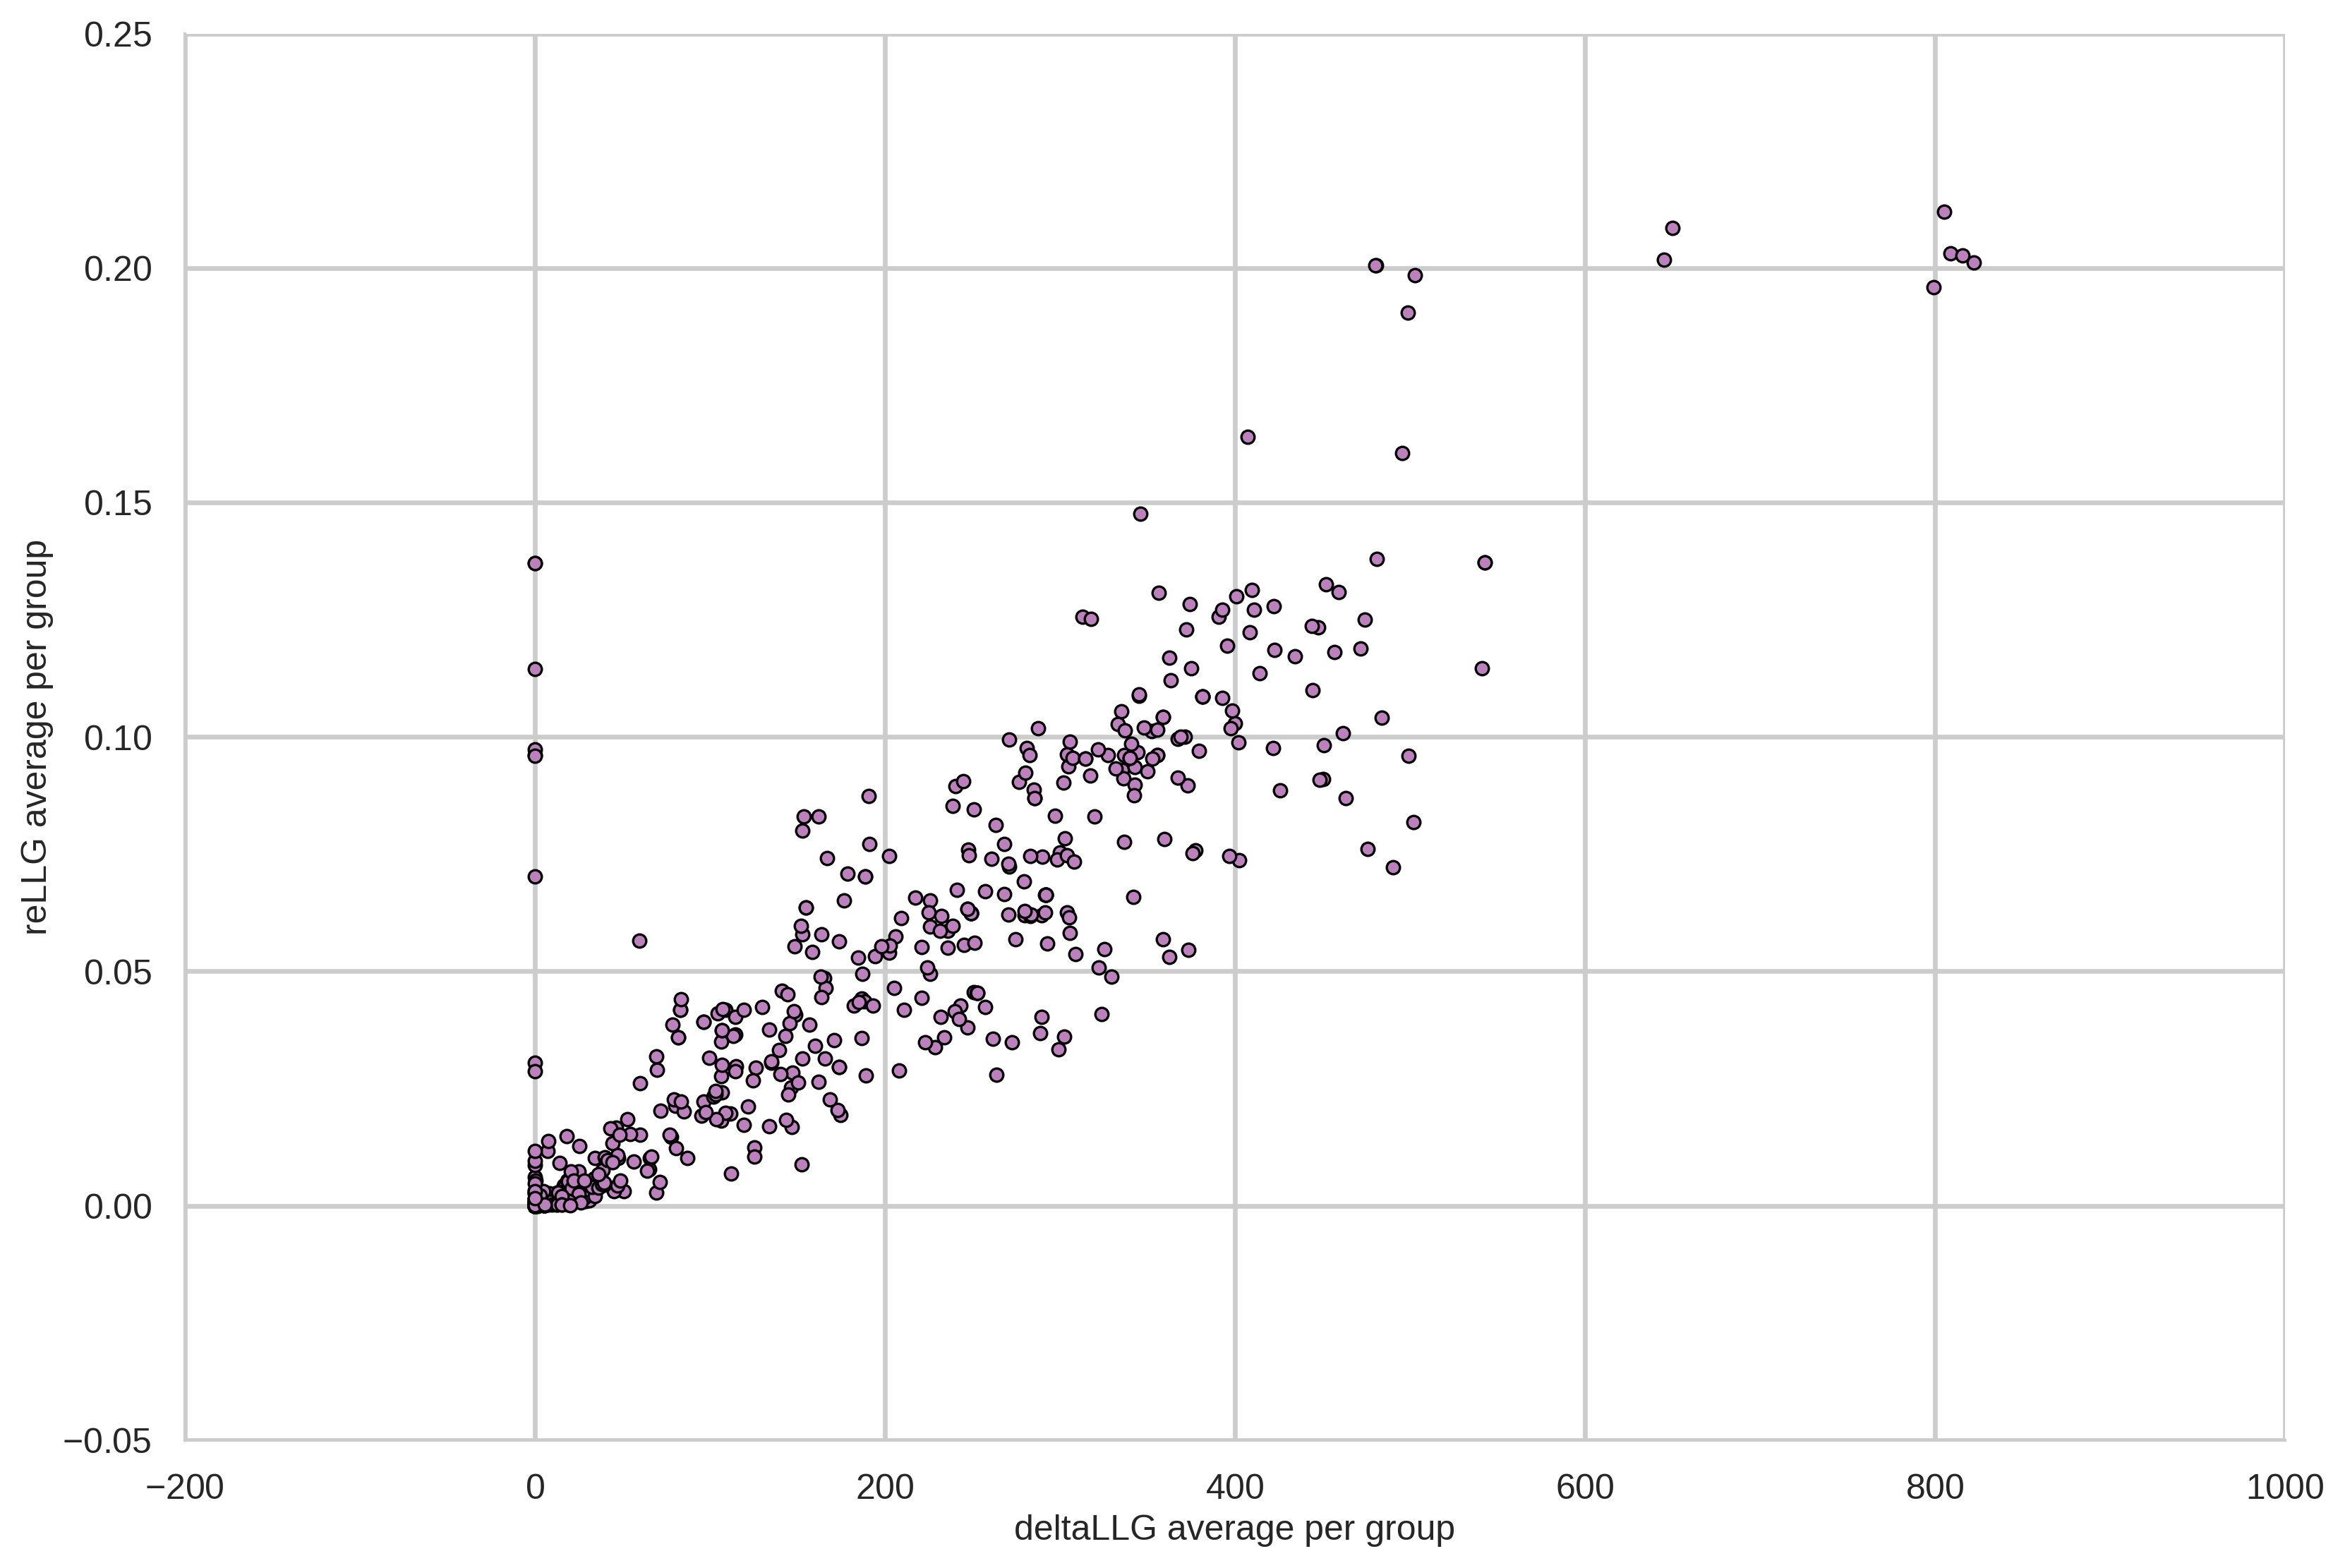

In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1073-D1:  TBM-easy case, 2 copies, complete molecule, data to 1.9 Å


# df_llg_data
subset_llg_t1073 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1073') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1073)
#print("Size subset llg",len(subset_llg_t1073))


# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1073 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1073') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1073)
#print("Size subset bcons",len(subset_bcons_t1073))

#merge_for_scatter_bcons_t1073 = pd.merge(subset_llg_t1073,subset_bcons_t1073)
#display(merge_for_scatter_bcons_t1073)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#plotted_bcons = merge_for_scatter_bcons_t1073.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#print("size merge ",len(merge_for_scatter_bcons_t1073))
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")

# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1073 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1073') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1073)
#print("Size subset as rmsd",len(subset_as_rmsd_t1073))
merge_for_scatter_as_rmsd_t1073 = pd.merge(subset_llg_t1073,subset_as_rmsd_t1073)
#display(merge_for_scatter_as_rmsd_t1073)
#print("size for merge ",len(merge_for_scatter_as_rmsd_t1073))
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1073.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")



# This last part was just for seeing the outliers
#negative = (merge_for_scatter_as_rmsd_t1073.loc[(merge_for_scatter_as_rmsd_t1073['LLG_B_from_rms_deltaLLG']<=0)]).copy(deep=True)
#negative_bis = negative.loc[negative['reLLG_as_rmsd']>=0.05]
#negative_bis.sort_values(by='reLLG_as_rmsd',inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  #display(negative_bis)


Text(0, 0.5, 'reLLG average per group')

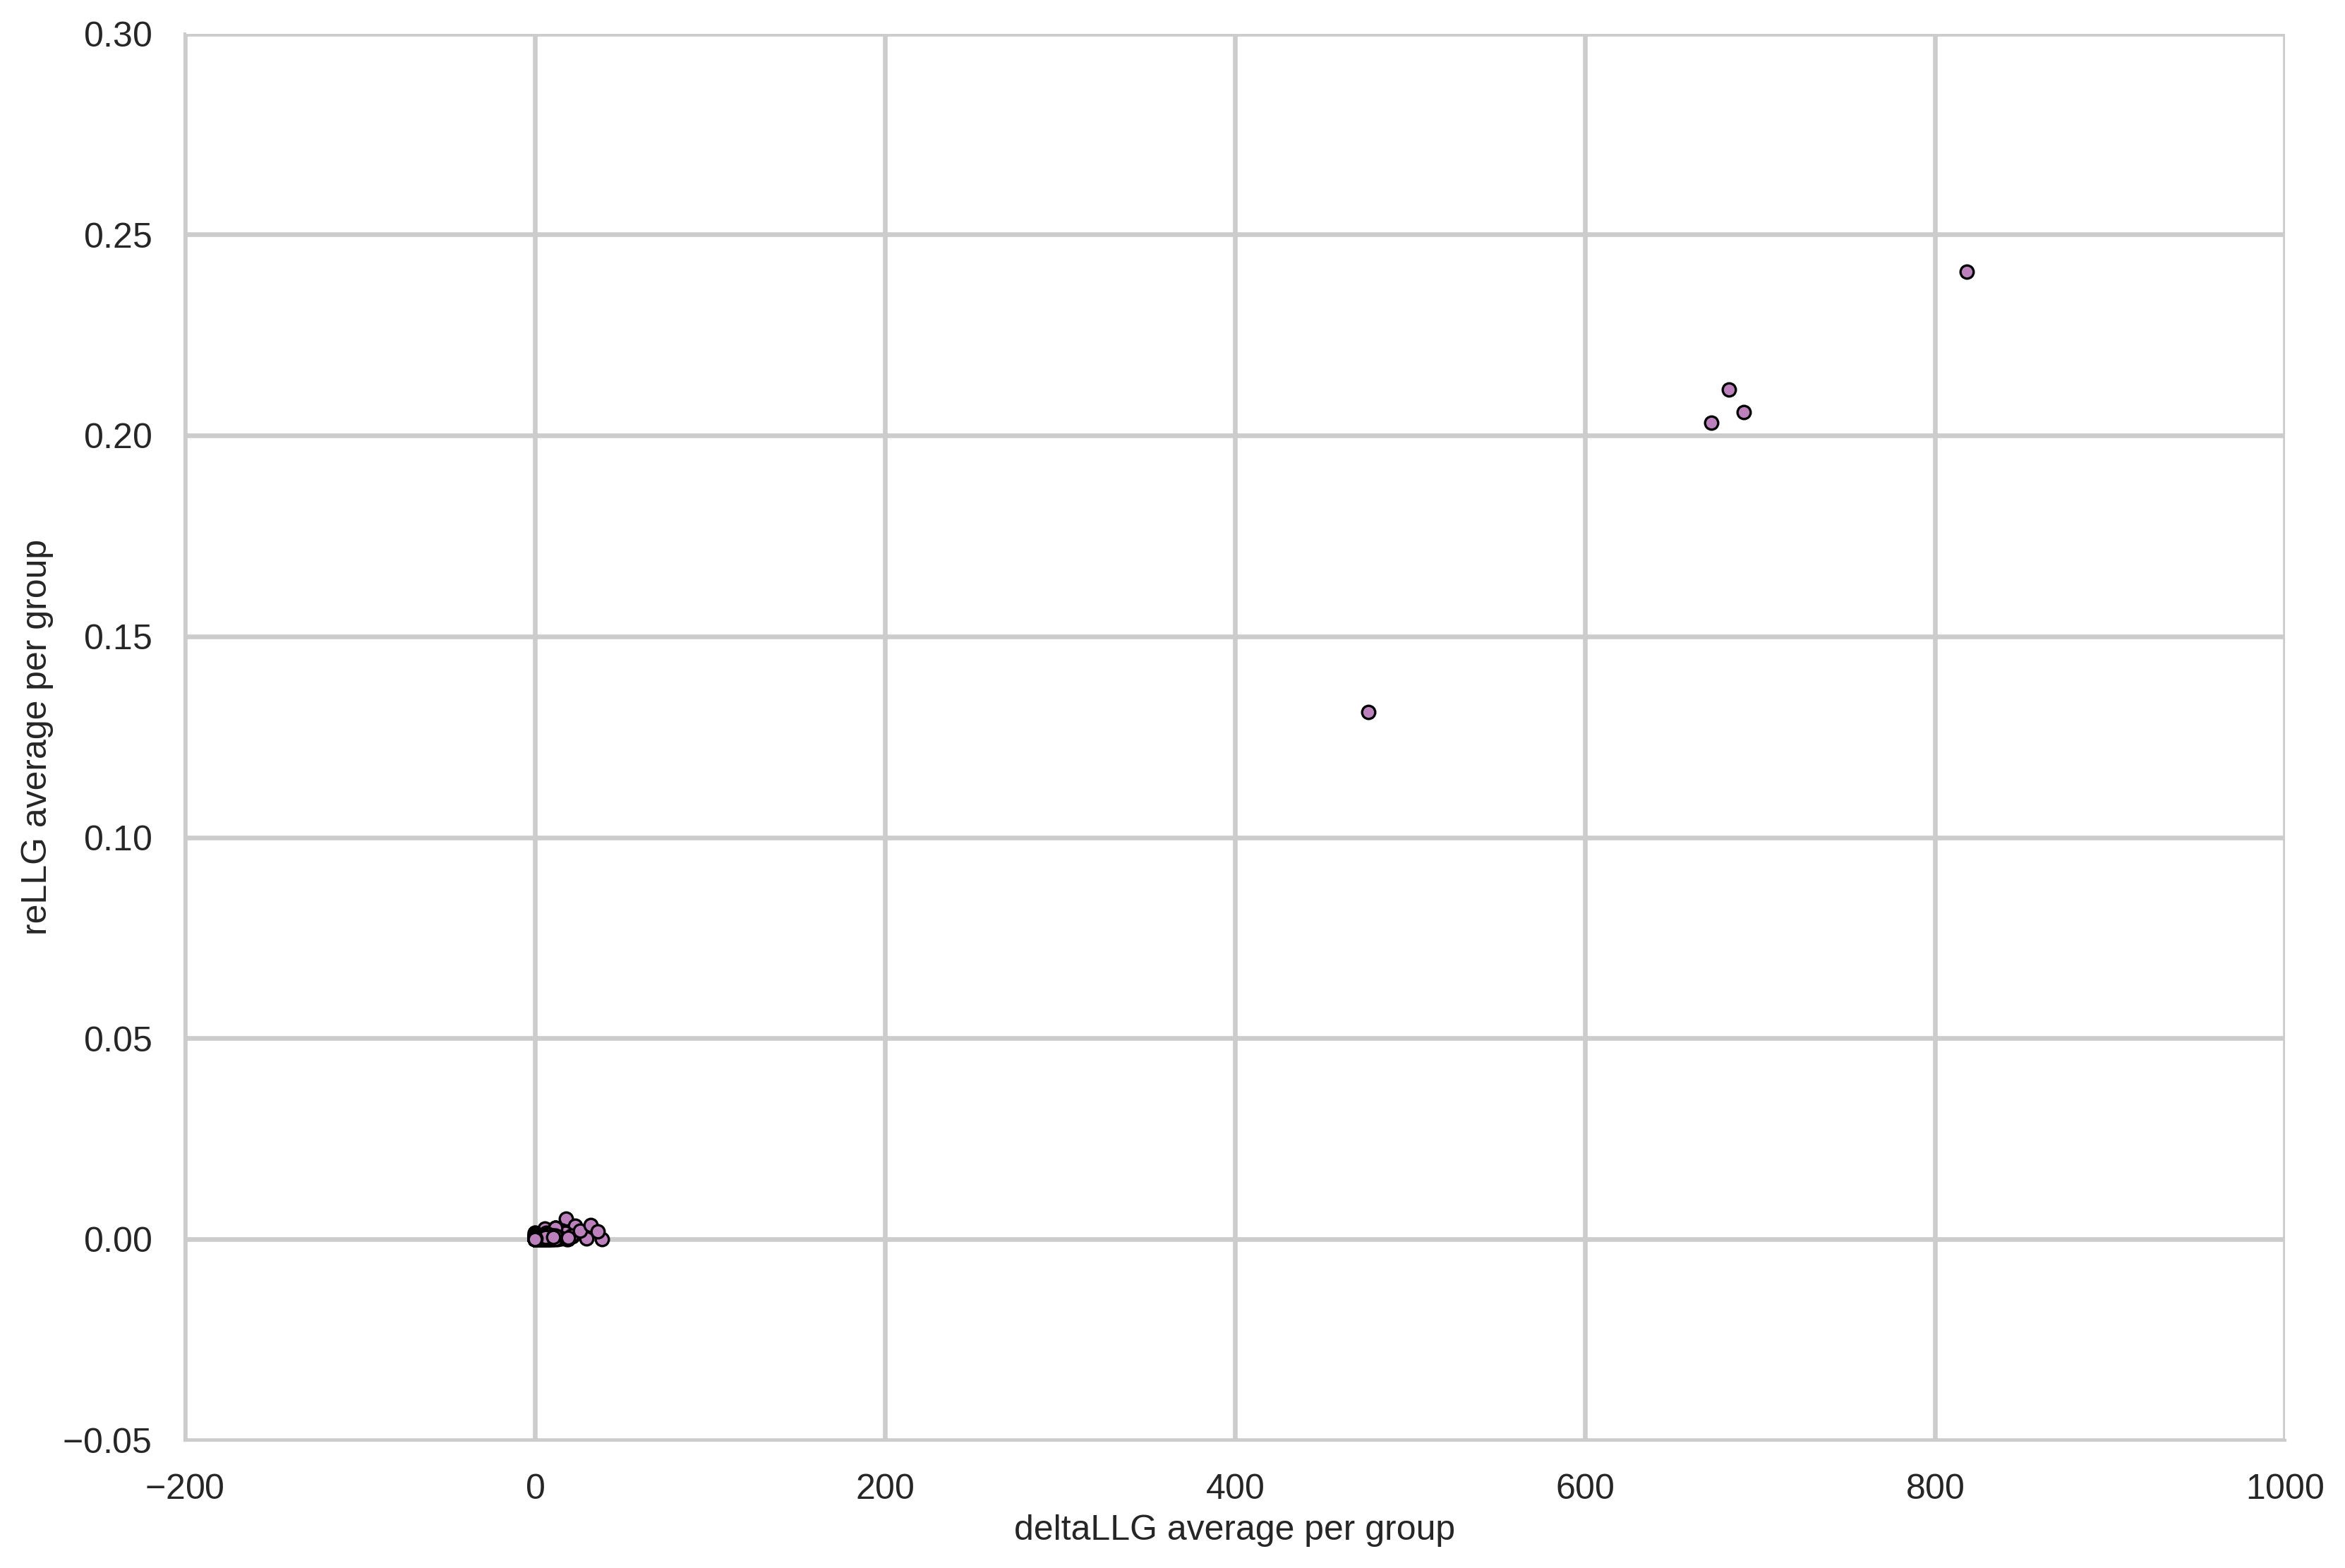

In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1074-D1:  FM case, 1 copy, complete molecule, data to 1.5 Å

# df_llg_data
subset_llg_t1074 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1074') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1074)
#print("Size subset llg",len(subset_llg_t1074))

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1074 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1074') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1074)
#print("Size subset bcons",len(subset_bcons_t1074))
#merge_for_scatter_bcons_t1074 = pd.merge(subset_llg_t1074,subset_bcons_t1074)
#display(merge_for_scatter_bcons_t1074)
#print("size of merge ",len(merge_for_scatter_bcons_t1074))
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#merge_for_scatter_bcons_t1074.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')


# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1074 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1074') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1074)
#print("Size subset as rmsd",len(subset_as_rmsd_t1074))
merge_for_scatter_as_rmsd_t1074 = pd.merge(subset_llg_t1074,subset_as_rmsd_t1074)
#display(merge_for_scatter_as_rmsd_t1074)
#print("size of merge ",merge_for_scatter_as_rmsd_t1074)
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1074.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")


# This part is for seeing the top performers
#supergood = (merge_for_scatter_as_rmsd_t1074.loc[(merge_for_scatter_as_rmsd_t1074['LLG_B_from_rms_deltaLLG']>400)]).copy(deep=True)
#supergood_bis = supergood.loc[supergood['reLLG_as_rmsd']>=0.1]
#supergood_bis.sort_values(by='reLLG_as_rmsd',inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#  display(supergood_bis)



In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-poster'])
plt.rcParams['font.family'] = 'Arial'

# Overall ranking of the groups by their average z-score considering only their model 1

###########
# AS_RMSD #
###########

#df_mod1_as_rmsd = df_all_as_rmsd[df_all_as_rmsd['Self_rank']== '1'] # Already done in a previous cell

#print("BEFORE FILTERING GROUPS BELOW 2/3",len(df_mod1_as_rmsd))
# Before doing the ranking, make sure to eliminate those groups marked in list_to_eliminate
df_mod1_as_rmsd =  df_mod1_as_rmsd.loc[~df_mod1_as_rmsd['Name_Group'].isin(list_to_eliminate)]
#print("AFTER FILTERING GROUPS BELOW 2/3",len(df_mod1_as_rmsd))

print("BEFORE ADDING PENALIZATION",len(df_mod1_as_rmsd))
display(df_mod1_as_rmsd)
# For every target_evaluation that a group did not cover we need to add a dummy model 1 and penalise it with a -2

temp_data = df_mod1_as_rmsd.copy(deep=True)

list_dataframes_to_concat = []

by_groups = temp_data.groupby(['Name_Group'])
for group in by_groups:
  print("\n\nChecking targets evaluated for group  ",group[0])
  targets_evaluated_by_group = group[1]['Target_Evaluation'].unique() 
  print("Targets evaluated by this group are ",len(targets_evaluated_by_group))
  #print(targets_evaluated_by_group)
  diff = set(list_target_evaluation)-set(targets_evaluated_by_group)
  if len(diff) > 0:
    print("Diff is ",diff)
    print("This group did not predict the targets:")
    # we then need to add a row per each target not evaluated
    # headers of a row Model	reLLG_as_rmsd	status_as_rmsd	Target_Evaluation	Target	Self_rank	Group	reLLG_as_rmsd_zscore	Name_Group	Has_Xray_Data	Has_EM_Data	Experimental_Method
    for not_evaluated in diff:
      print(not_evaluated)
      #print("BEFORE")
      #display(group[1])
      #new = group[1].append({'Model': "dummy"+str(not_evaluated),"reLLG_as_rmsd":0, "status_as_rmsd":0,"Target_Evaluation":not_evaluated,"Target":not_evaluated[:5],"Self_rank":1,"Group":"None","reLLG_as_rmsd_zscore":-2, "Name_Group":group[0],"Has_Xray_Data":False, "Has_EM_Data":False,"Experimental_Method":"None"},ignore_index=True)
      #new = group[1].append(["dummy"+str(not_evaluated),0,0,not_evaluated,not_evaluated[:5],0,group[0],-2,group[0],False,False,"None"])
      #print("AFTER")
      display(new)
      list_dataframes_to_concat.append(new)
      break
#  else: # we will concatenate as it is
#      display(group[1])
#      list_dataframes_to_concat.append(group[1])


#concatenated = pd.concat(list_dataframes_to_concat)
#print("AFTER ADDING PENALIZATION",len(concatenated))
#display(concatenated)



BEFORE ADDING PENALIZATION 9648


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
1,T1035TS005_1-D1,0.000072,0,T1035-D1,1035,1,005,-0.411299,Seder2020,True,False,X-ray
6,T1035TS009_1-D1,0.048628,0,T1035-D1,1035,1,009,1.589016,tFold_human,True,False,X-ray
11,T1035TS013_1-D1,0.000248,0,T1035-D1,1035,1,013,-0.404039,FEIG-S,True,False,X-ray
16,T1035TS014_1-D1,0.000063,0,T1035-D1,1035,1,014,-0.411656,xianmingpan,True,False,X-ray
21,T1035TS015_1-D1,0.000187,0,T1035-D1,1035,1,015,-0.406535,AP_1,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48793,T1036s1TS435_1-D1,0.001439,0,T1036s1-D1,1036,1,435,-0.581513,Zhang_Ab_Initio,False,True,Cryo-EM
48798,T1036s1TS437_1-D1,0.000006,0,T1036s1-D1,1036,1,437,-0.696894,MUFOLD2,False,True,Cryo-EM
48803,T1036s1TS460_1-D1,0.014135,0,T1036s1-D1,1036,1,460,0.440729,Yang_TBM,False,True,Cryo-EM
48808,T1036s1TS468_1-D1,0.000008,0,T1036s1-D1,1036,1,468,-0.696697,FALCON-geom,False,True,Cryo-EM




Checking targets evaluated for group   191227
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   3D-JIGSAW-SwarmLoop
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
162,T1035TS169_1-D1,0.000162,0,T1035-D1,1035,1,169,-0.407571,3D-JIGSAW-SwarmLoop,True,False,X-ray
679,T1034TS169_1-D1,0.000032,0,T1034-D1,1034,1,169,-0.702187,3D-JIGSAW-SwarmLoop,True,False,X-ray
1233,T1032TS169_1-D1,0.000273,0,T1032-D1,1032,1,169,-0.318401,3D-JIGSAW-SwarmLoop,True,False,X-ray
1820,T1033TS169_1-D1,0.000189,0,T1033-D1,1033,1,169,-0.154434,3D-JIGSAW-SwarmLoop,False,False,X-ray
2336,T1031TS169_1-D1,0.000038,0,T1031-D1,1031,1,169,-0.204325,3D-JIGSAW-SwarmLoop,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47666,T1095TS169_1-D1,0.000005,0,T1095-D1,1095,1,169,-0.671237,3D-JIGSAW-SwarmLoop,False,True,Cryo-EM
48067,T1028TS169_1-D1,0.000175,0,T1028-D1,1028,1,169,-0.765428,3D-JIGSAW-SwarmLoop,False,False,X-ray
48268,T1025TS169_1-D1,0.034424,0,T1025-D1,1025,1,169,-0.235045,3D-JIGSAW-SwarmLoop,False,False,X-ray
48478,T1045s1TS169_1-D1,0.008024,0,T1045s1-D1,1045,1,169,-0.879120,3D-JIGSAW-SwarmLoop,False,False,X-ray




Checking targets evaluated for group   ACOMPMOD
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
86,T1035TS063_1-D1,0.000000,-2,T1035-D1,1035,1,063,-0.414249,ACOMPMOD,True,False,X-ray
604,T1034TS063_1-D1,0.000022,0,T1034-D1,1034,1,063,-0.702403,ACOMPMOD,True,False,X-ray
1158,T1032TS063_1-D1,0.000039,0,T1032-D1,1032,1,063,-0.342607,ACOMPMOD,True,False,X-ray
1744,T1033TS063_1-D1,0.000022,0,T1033-D1,1033,1,063,-0.177246,ACOMPMOD,False,False,X-ray
2260,T1031TS063_1-D1,0.000023,0,T1031-D1,1031,1,063,-0.207070,ACOMPMOD,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47591,T1095TS063_1-D1,0.000000,-3,T1095-D1,1095,1,063,-0.674973,ACOMPMOD,False,True,Cryo-EM
48029,T1028TS063_1-D1,0.000031,0,T1028-D1,1028,1,063,-0.769045,ACOMPMOD,False,False,X-ray
48230,T1025TS063_1-D1,0.000042,0,T1025-D1,1025,1,063,-0.983228,ACOMPMOD,False,False,X-ray
48438,T1045s1TS063_1-D1,0.000035,0,T1045s1-D1,1045,1,063,-1.011745,ACOMPMOD,False,False,X-ray




Checking targets evaluated for group   AILON
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   AP_1
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   AWSEM-CHEN
Targets evaluated by this group are  94
Diff is  {'T1060s3-D1', 'T1060s2-D1'}
This group did not predict the targets:
T1060s3-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1060s2-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   AWSEM-Suite
Targets evaluated by this group are  95
Diff is  {'T1078-D1'}
This group did not predict the targets:
T1078-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   AlphaFold2
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   BAKER
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   BAKER-ROBETTA
Targets evaluated by this group are  86
Diff is  {'T1079-D1', 'T1091-D3', 'T1091-D1', 'T1091-D4', 'T1080-D1', 'T1091-D2', 'T1082-D1', 'T1078-D1', 'T1076-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1079-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D4


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1080-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1082-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1078-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1076-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   BAKER-ROSETTASERVER
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
199,T1035TS209_1-D1,0.000323,0,T1035-D1,1035,1,209,-0.400955,BAKER-ROSETTASERVER,True,False,X-ray
716,T1034TS209_1-D1,0.097937,0,T1034-D1,1034,1,209,1.417296,BAKER-ROSETTASERVER,True,False,X-ray
1272,T1032TS209_1-D1,0.016511,0,T1032-D1,1032,1,209,1.357005,BAKER-ROSETTASERVER,True,False,X-ray
1856,T1033TS209_1-D1,0.001747,0,T1033-D1,1033,1,209,0.058746,BAKER-ROSETTASERVER,False,False,X-ray
2372,T1031TS209_1-D1,0.000120,0,T1031-D1,1031,1,209,-0.188988,BAKER-ROSETTASERVER,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47702,T1095TS209_1-D1,0.002877,0,T1095-D1,1095,1,209,1.550538,BAKER-ROSETTASERVER,False,True,Cryo-EM
48088,T1028TS209_1-D1,0.111787,0,T1028-D1,1028,1,209,2.030872,BAKER-ROSETTASERVER,False,False,X-ray
48289,T1025TS209_1-D1,0.137648,0,T1025-D1,1025,1,209,2.011189,BAKER-ROSETTASERVER,False,False,X-ray
48499,T1045s1TS209_1-D1,0.109896,0,T1045s1-D1,1045,1,209,0.812033,BAKER-ROSETTASERVER,False,False,X-ray




Checking targets evaluated for group   BAKER-experimental
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   BaiduUSA
Targets evaluated by this group are  82
Diff is  {'T1050-D3', 'T1050-D2', 'T1052-D1', 'T1061-D2', 'T1052-D2', 'T1045s1-D1', 'T1028-D1', 'T1050-D1', 'T1061-D1', 'T1061-D3', 'T1049-D1', 'T1025-D1', 'T1052-D3', 'T1036s1-D1'}
This group did not predict the targets:
T1050-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1050-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1052-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1052-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1050-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1049-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1052-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Bates_BMM
Targets evaluated by this group are  66
Diff is  {'T1100-D2', 'T1091-D2', 'T1101-D2', 'T1085-D2', 'T1090-D1', 'T1085-D3', 'T1091-D3', 'T1086-D2', 'T1091-D1', 'T1086-D1', 'T1036s1-D1', 'T1094-D2', 'T1096-D1', 'T1094-D1', 'T1092-D1', 'T1091-D4', 'T1085-D1', 'T1100-D1', 'T1025-D1', 'T1079-D1', 'T1045s1-D1', 'T1093-D3', 'T1028-D1', 'T1095-D1', 'T1093-D2', 'T1093-D1', 'T1101-D1', 'T1096-D2', 'T1089-D1', 'T1092-D2'}
This group did not predict the targets:
T1100-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1090-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1086-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1086-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1094-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1094-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1092-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D4


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1100-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1079-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1095-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1089-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1092-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   BhageerathH-Plus
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
163,T1035TS170_1-D1,0.000054,0,T1035-D1,1035,1,170,-0.412006,BhageerathH-Plus,True,False,X-ray
680,T1034TS170_1-D1,0.002747,0,T1034-D1,1034,1,170,-0.643406,BhageerathH-Plus,True,False,X-ray
1234,T1032TS170_1-D1,0.000047,0,T1032-D1,1032,1,170,-0.341747,BhageerathH-Plus,True,False,X-ray
1821,T1033TS170_1-D1,0.000243,0,T1033-D1,1033,1,170,-0.146990,BhageerathH-Plus,False,False,X-ray
2337,T1031TS170_1-D1,0.000088,0,T1031-D1,1031,1,170,-0.195042,BhageerathH-Plus,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47667,T1095TS170_1-D1,0.000565,0,T1095-D1,1095,1,170,-0.237987,BhageerathH-Plus,False,True,Cryo-EM
48068,T1028TS170_1-D1,0.028977,0,T1028-D1,1028,1,170,-0.043844,BhageerathH-Plus,False,False,X-ray
48269,T1025TS170_1-D1,0.003998,0,T1025-D1,1025,1,170,-0.897151,BhageerathH-Plus,False,False,X-ray
48479,T1045s1TS170_1-D1,0.038565,0,T1045s1-D1,1045,1,170,-0.372119,BhageerathH-Plus,False,False,X-ray




Checking targets evaluated for group   Bhattacharya
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Bilbul2020
Targets evaluated by this group are  90
Diff is  {'T1054-D1', 'T1045s1-D1', 'T1028-D1', 'T1055-D1', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1054-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1055-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   CAO-QA1
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   CAO-SERVER
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
292,T1035TS305_1-D1,0.000185,0,T1035-D1,1035,1,305,-0.406646,CAO-SERVER,True,False,X-ray
809,T1034TS305_1-D1,0.000017,0,T1034-D1,1034,1,305,-0.702517,CAO-SERVER,True,False,X-ray
1361,T1032TS305_1-D1,0.000041,0,T1032-D1,1032,1,305,-0.342361,CAO-SERVER,True,False,X-ray
1948,T1033TS305_1-D1,0.000202,0,T1033-D1,1033,1,305,-0.152614,CAO-SERVER,False,False,X-ray
2467,T1031TS305_1-D1,0.000062,0,T1031-D1,1031,1,305,-0.199713,CAO-SERVER,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47784,T1095TS305_1-D1,0.000005,0,T1095-D1,1095,1,305,-0.670819,CAO-SERVER,False,True,Cryo-EM
48124,T1028TS305_1-D1,0.000022,0,T1028-D1,1028,1,305,-0.769256,CAO-SERVER,False,False,X-ray
48329,T1025TS305_1-D1,0.000013,0,T1025-D1,1025,1,305,-0.983860,CAO-SERVER,False,False,X-ray
48539,T1045s1TS305_1-D1,0.000048,0,T1045s1-D1,1045,1,305,-1.011539,CAO-SERVER,False,False,X-ray




Checking targets evaluated for group   CATHER
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
343,T1035TS337_1-D1,0.006699,0,T1035-D1,1035,1,337,-0.138293,CATHER,True,False,X-ray
864,T1034TS337_1-D1,0.044982,0,T1034-D1,1034,1,337,0.270911,CATHER,True,False,X-ray
1416,T1032TS337_1-D1,0.001620,0,T1032-D1,1032,1,337,-0.179391,CATHER,True,False,X-ray
1999,T1033TS337_1-D1,0.000416,0,T1033-D1,1033,1,337,-0.123336,CATHER,False,False,X-ray
2518,T1031TS337_1-D1,0.000165,0,T1031-D1,1031,1,337,-0.180703,CATHER,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47834,T1095TS337_1-D1,0.002040,0,T1095-D1,1095,1,337,0.903124,CATHER,False,True,Cryo-EM
48149,T1028TS337_1-D1,0.115457,0,T1028-D1,1028,1,337,2.122834,CATHER,False,False,X-ray
48354,T1025TS337_1-D1,0.000013,0,T1025-D1,1025,1,337,-0.983864,CATHER,False,False,X-ray
48564,T1045s1TS337_1-D1,0.021294,0,T1045s1-D1,1045,1,337,-0.658827,CATHER,False,False,X-ray




Checking targets evaluated for group   CUTSP
Targets evaluated by this group are  64
Diff is  {'T1050-D3', 'T1050-D2', 'T1050-D1', 'T1100-D2', 'T1091-D2', 'T1101-D2', 'T1085-D2', 'T1060s3-D1', 'T1085-D3', 'T1091-D3', 'T1091-D1', 'T1061-D3', 'T1036s1-D1', 'T1094-D2', 'T1061-D2', 'T1094-D1', 'T1092-D1', 'T1080-D1', 'T1091-D4', 'T1024-D2', 'T1085-D1', 'T1100-D1', 'T1024-D1', 'T1025-D1', 'T1045s1-D1', 'T1093-D3', 'T1028-D1', 'T1093-D2', 'T1061-D1', 'T1093-D1', 'T1101-D1', 'T1092-D2'}
This group did not predict the targets:
T1050-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1050-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1050-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1100-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1060s3-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1094-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1094-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1092-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1080-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1091-D4


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1100-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1092-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   DATE
Targets evaluated by this group are  91
Diff is  {'T1087-D1', 'T1045s1-D1', 'T1028-D1', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1087-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   DELCLAB
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   DeepPotential
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   DellaCorteLab
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Destini
Targets evaluated by this group are  91
Diff is  {'T1045s1-D1', 'T1028-D1', 'T1025-D1', 'T1076-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1076-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   E2E
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   EMAP_CHAE
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FALCON-DeepFolder
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
322,T1035TS326_1-D1,0.001247,0,T1035-D1,1035,1,326,-0.362889,FALCON-DeepFolder,True,False,X-ray
839,T1034TS326_1-D1,0.013216,0,T1034-D1,1034,1,326,-0.416784,FALCON-DeepFolder,True,False,X-ray
1391,T1032TS326_1-D1,0.004135,0,T1032-D1,1032,1,326,0.080029,FALCON-DeepFolder,True,False,X-ray
1978,T1033TS326_1-D1,0.000528,0,T1033-D1,1033,1,326,-0.108016,FALCON-DeepFolder,False,False,X-ray
2497,T1031TS326_1-D1,0.000516,0,T1031-D1,1031,1,326,-0.115648,FALCON-DeepFolder,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47814,T1095TS326_1-D1,0.000010,0,T1095-D1,1095,1,326,-0.667111,FALCON-DeepFolder,False,True,Cryo-EM
48144,T1028TS326_1-D1,0.003386,0,T1028-D1,1028,1,326,-0.684981,FALCON-DeepFolder,False,False,X-ray
48349,T1025TS326_1-D1,0.022560,0,T1025-D1,1025,1,326,-0.493233,FALCON-DeepFolder,False,False,X-ray
48559,T1045s1TS326_1-D1,0.026828,0,T1045s1-D1,1045,1,326,-0.566970,FALCON-DeepFolder,False,False,X-ray




Checking targets evaluated for group   FALCON-TBM
Targets evaluated by this group are  84
Diff is  {'T1085-D3', 'T1096-D1', 'T1070-D1', 'T1085-D1', 'T1084-D1', 'T1096-D2', 'T1070-D2', 'T1070-D4', 'T1085-D2', 'T1082-D1', 'T1070-D3', 'T1076-D1'}
This group did not predict the targets:
T1085-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1070-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1084-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1070-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1070-D4


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1082-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1070-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1076-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FALCON-geom
Targets evaluated by this group are  90
Diff is  {'T1061-D2', 'T1024-D2', 'T1061-D1', 'T1061-D3', 'T1024-D1', 'T1043-D1'}
This group did not predict the targets:
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1043-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FEIG
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FEIG-R1
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FEIG-R2
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FEIG-R3
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FEIG-S
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
11,T1035TS013_1-D1,0.000248,0,T1035-D1,1035,1,013,-0.404039,FEIG-S,True,False,X-ray
529,T1034TS013_1-D1,0.137909,0,T1034-D1,1034,1,013,2.282643,FEIG-S,True,False,X-ray
1088,T1032TS013_1-D1,0.008008,0,T1032-D1,1032,1,013,0.479654,FEIG-S,True,False,X-ray
1669,T1033TS013_1-D1,0.000192,0,T1033-D1,1033,1,013,-0.154004,FEIG-S,False,False,X-ray
2190,T1031TS013_1-D1,0.000780,0,T1031-D1,1031,1,013,-0.066683,FEIG-S,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47521,T1095TS013_1-D1,0.000889,0,T1095-D1,1095,1,013,0.012998,FEIG-S,False,True,Cryo-EM
48004,T1028TS013_1-D1,0.046624,0,T1028-D1,1028,1,013,0.398295,FEIG-S,False,False,X-ray
48205,T1025TS013_1-D1,0.096865,0,T1025-D1,1025,1,013,1.123708,FEIG-S,False,False,X-ray
48413,T1045s1TS013_1-D1,0.112451,0,T1045s1-D1,1045,1,013,0.854443,FEIG-S,False,False,X-ray




Checking targets evaluated for group   FoldEM
Targets evaluated by this group are  65
Diff is  {'T1087-D1', 'T1047s1-D1', 'T1074-D1', 'T1053-D1', 'T1047s2-D2', 'T1100-D2', 'T1101-D2', 'T1099-D1', 'T1034-D1', 'T1047s2-D1', 'T1061-D3', 'T1058-D2', 'T1073-D1', 'T1036s1-D1', 'T1061-D2', 'T1032-D1', 'T1096-D1', 'T1041-D1', 'T1100-D1', 'T1025-D1', 'T1078-D1', 'T1047s2-D3', 'T1045s1-D1', 'T1095-D1', 'T1028-D1', 'T1061-D1', 'T1053-D2', 'T1101-D1', 'T1096-D2', 'T1049-D1', 'T1058-D1'}
This group did not predict the targets:
T1087-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1047s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1074-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1053-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1047s2-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1100-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1099-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1034-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1047s2-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1058-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1073-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1032-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1041-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1100-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1078-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1047s2-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1095-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1053-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1101-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1049-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1058-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   FoldX
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
395,T1035TS367_1-D1,0.001459,0,T1035-D1,1035,1,367,-0.354151,FoldX,True,False,X-ray
919,T1034TS367_1-D1,0.005873,0,T1034-D1,1034,1,367,-0.575749,FoldX,True,False,X-ray
1466,T1032TS367_1-D1,0.005607,0,T1032-D1,1032,1,367,0.231962,FoldX,True,False,X-ray
2050,T1033TS367_1-D1,0.000309,0,T1033-D1,1033,1,367,-0.137905,FoldX,False,False,X-ray
2570,T1031TS367_1-D1,0.000147,0,T1031-D1,1031,1,367,-0.184074,FoldX,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47881,T1095TS367_1-D1,0.000007,0,T1095-D1,1095,1,367,-0.669762,FoldX,False,True,Cryo-EM
48164,T1028TS367_1-D1,0.001619,0,T1028-D1,1028,1,367,-0.729264,FoldX,False,False,X-ray
48369,T1025TS367_1-D1,0.022595,0,T1025-D1,1025,1,367,-0.492471,FoldX,False,False,X-ray
48579,T1045s1TS367_1-D1,0.021322,0,T1045s1-D1,1045,1,367,-0.658367,FoldX,False,False,X-ray




Checking targets evaluated for group   FoldXpro
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   GAPF_LNCC_SERVER
Targets evaluated by this group are  88
Diff is  {'T1061-D2', 'T1093-D3', 'T1024-D2', 'T1061-D1', 'T1093-D2', 'T1061-D3', 'T1093-D1', 'T1024-D1'}
This group did not predict the targets:
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1093-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Gonglab-THU
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   HMSCasper-MSA
Targets evaluated by this group are  69
Diff is  {'T1040-D1', 'T1034-D1', 'T1042-D1', 'T1039-D1', 'T1038-D2', 'T1038-D1', 'T1036s1-D1', 'T1031-D1', 'T1030-D1', 'T1032-D1', 'T1041-D1', 'T1024-D2', 'T1030-D2', 'T1024-D1', 'T1045s2-D1', 'T1025-D1', 'T1043-D1', 'T1046s1-D1', 'T1037-D1', 'T1035-D1', 'T1045s1-D1', 'T1028-D1', 'T1029-D1', 'T1046s2-D1', 'T1027-D1', 'T1026-D1', 'T1033-D1'}
This group did not predict the targets:
T1040-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1034-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1042-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1039-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1038-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1038-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1031-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1030-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1032-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1041-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1030-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s2-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1043-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1046s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1037-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1035-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1029-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1046s2-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1027-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1026-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1033-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   HMSCasper-PSSM
Targets evaluated by this group are  91
Diff is  {'T1045s1-D1', 'T1028-D1', 'T1082-D1', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1082-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   HMSCasper-Seq
Targets evaluated by this group are  90
Diff is  {'T1045s1-D1', 'T1028-D1', 'T1024-D2', 'T1024-D1', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1024-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   IntFOLD6
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
61,T1035TS050_1-D1,0.000187,0,T1035-D1,1035,1,050,-0.406535,IntFOLD6,True,False,X-ray
579,T1034TS050_1-D1,0.055033,0,T1034-D1,1034,1,050,0.488487,IntFOLD6,True,False,X-ray
1138,T1032TS050_1-D1,0.001783,0,T1032-D1,1032,1,050,-0.162580,IntFOLD6,True,False,X-ray
1719,T1033TS050_1-D1,0.000448,0,T1033-D1,1033,1,050,-0.118899,IntFOLD6,False,False,X-ray
2240,T1031TS050_1-D1,0.000200,0,T1031-D1,1031,1,050,-0.174227,IntFOLD6,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47571,T1095TS050_1-D1,0.003599,0,T1095-D1,1095,1,050,2.108590,IntFOLD6,False,True,Cryo-EM
48019,T1028TS050_1-D1,0.118959,0,T1028-D1,1028,1,050,2.210566,IntFOLD6,False,False,X-ray
48220,T1025TS050_1-D1,0.136901,0,T1025-D1,1025,1,050,1.994942,IntFOLD6,False,False,X-ray
48428,T1045s1TS050_1-D1,0.201369,0,T1045s1-D1,1045,1,050,2.330563,IntFOLD6,False,False,X-ray




Checking targets evaluated for group   Jones-UCL
Targets evaluated by this group are  91
Diff is  {'T1061-D2', 'T1045s1-D1', 'T1028-D1', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Kiharalab
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Kiharalab_Z_Server
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
390,T1035TS364_1-D1,0.000040,0,T1035-D1,1035,1,364,-0.412618,Kiharalab_Z_Server,True,False,X-ray
914,T1034TS364_1-D1,0.013050,0,T1034-D1,1034,1,364,-0.420361,Kiharalab_Z_Server,True,False,X-ray
1461,T1032TS364_1-D1,0.000854,0,T1032-D1,1032,1,364,-0.258516,Kiharalab_Z_Server,True,False,X-ray
2045,T1033TS364_1-D1,0.000810,0,T1033-D1,1033,1,364,-0.069447,Kiharalab_Z_Server,False,False,X-ray
2565,T1031TS364_1-D1,0.000341,0,T1031-D1,1031,1,364,-0.148011,Kiharalab_Z_Server,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47876,T1095TS364_1-D1,0.000026,0,T1095-D1,1095,1,364,-0.654955,Kiharalab_Z_Server,False,True,Cryo-EM
48159,T1028TS364_1-D1,0.000495,0,T1028-D1,1028,1,364,-0.757406,Kiharalab_Z_Server,False,False,X-ray
48364,T1025TS364_1-D1,0.010884,0,T1025-D1,1025,1,364,-0.747314,Kiharalab_Z_Server,False,False,X-ray
48574,T1045s1TS364_1-D1,0.018711,0,T1045s1-D1,1045,1,364,-0.701709,Kiharalab_Z_Server,False,False,X-ray




Checking targets evaluated for group   LAW
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
147,T1035TS138_1-D1,7.870884e-05,0,T1035-D1,1035,1,138,-0.411007,LAW,True,False,X-ray
664,T1034TS138_1-D1,7.953675e-05,0,T1034-D1,1034,1,138,-0.701162,LAW,True,False,X-ray
1218,T1032TS138_1-D1,1.082489e-03,0,T1032-D1,1032,1,138,-0.234893,LAW,True,False,X-ray
1805,T1033TS138_1-D1,1.653097e-04,0,T1033-D1,1033,1,138,-0.157625,LAW,False,False,X-ray
2321,T1031TS138_1-D1,1.087583e-04,0,T1031-D1,1031,1,138,-0.191137,LAW,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47651,T1095TS138_1-D1,1.813372e-05,0,T1095-D1,1095,1,138,-0.660947,LAW,False,True,Cryo-EM
48054,T1028TS138_1-D1,4.784073e-05,0,T1028-D1,1028,1,138,-0.768621,LAW,False,False,X-ray
48255,T1025TS138_1-D1,1.755782e-03,0,T1025-D1,1025,1,138,-0.945945,LAW,False,False,X-ray
48463,T1045s1TS138_1-D1,2.417960e-03,0,T1045s1-D1,1045,1,138,-0.972193,LAW,False,False,X-ray




Checking targets evaluated for group   MASS
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
302,T1035TS317_1-D1,0.000035,0,T1035-D1,1035,1,317,-0.412826,MASS,True,False,X-ray
819,T1034TS317_1-D1,0.000086,0,T1034-D1,1034,1,317,-0.701025,MASS,True,False,X-ray
1371,T1032TS317_1-D1,0.002823,0,T1032-D1,1032,1,317,-0.055314,MASS,True,False,X-ray
1958,T1033TS317_1-D1,0.000225,0,T1033-D1,1033,1,317,-0.149395,MASS,False,False,X-ray
2477,T1031TS317_1-D1,0.000036,0,T1031-D1,1031,1,317,-0.204634,MASS,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47794,T1095TS317_1-D1,0.000003,0,T1095-D1,1095,1,317,-0.672903,MASS,False,True,Cryo-EM
48129,T1028TS317_1-D1,0.000053,0,T1028-D1,1028,1,317,-0.768503,MASS,False,False,X-ray
48334,T1025TS317_1-D1,0.001543,0,T1025-D1,1025,1,317,-0.950573,MASS,False,False,X-ray
48544,T1045s1TS317_1-D1,0.002516,0,T1045s1-D1,1045,1,317,-0.970562,MASS,False,False,X-ray




Checking targets evaluated for group   MESHI
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   MUFOLD
Targets evaluated by this group are  94
Diff is  {'T1091-D4', 'T1061-D2'}
This group did not predict the targets:
T1091-D4


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   MUFOLD2
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
464,T1035TS437_1-D1,7.640362e-05,0,T1035-D1,1035,1,437,-0.411102,MUFOLD2,True,False,X-ray
986,T1034TS437_1-D1,5.023229e-06,0,T1034-D1,1034,1,437,-0.702775,MUFOLD2,True,False,X-ray
1535,T1032TS437_1-D1,2.854699e-06,0,T1032-D1,1032,1,437,-0.346292,MUFOLD2,True,False,X-ray
2120,T1033TS437_1-D1,3.567176e-04,0,T1033-D1,1033,1,437,-0.131446,MUFOLD2,False,False,X-ray
2639,T1031TS437_1-D1,9.504405e-07,0,T1031-D1,1031,1,437,-0.211119,MUFOLD2,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47948,T1095TS437_1-D1,1.089852e-03,0,T1095-D1,1095,1,437,0.168016,MUFOLD2,False,True,Cryo-EM
48179,T1028TS437_1-D1,1.502087e-05,0,T1028-D1,1028,1,437,-0.769443,MUFOLD2,False,False,X-ray
48384,T1025TS437_1-D1,4.051096e-06,0,T1025-D1,1025,1,437,-0.984064,MUFOLD2,False,False,X-ray
48594,T1045s1TS437_1-D1,4.054641e-03,0,T1045s1-D1,1045,1,437,-0.945022,MUFOLD2,False,False,X-ray




Checking targets evaluated for group   MUFOLD_H
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   MULTICOM
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   MULTICOM-CLUSTER
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
106,T1035TS075_1-D1,0.013128,0,T1035-D1,1035,1,075,0.126568,MULTICOM-CLUSTER,True,False,X-ray
624,T1034TS075_1-D1,0.051712,0,T1034-D1,1034,1,075,0.416597,MULTICOM-CLUSTER,True,False,X-ray
1178,T1032TS075_1-D1,0.000024,0,T1032-D1,1032,1,075,-0.344138,MULTICOM-CLUSTER,True,False,X-ray
1764,T1033TS075_1-D1,0.000437,0,T1033-D1,1033,1,075,-0.120484,MULTICOM-CLUSTER,False,False,X-ray
2280,T1031TS075_1-D1,0.000229,0,T1031-D1,1031,1,075,-0.168912,MULTICOM-CLUSTER,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47611,T1095TS075_1-D1,0.002314,0,T1095-D1,1095,1,075,1.115088,MULTICOM-CLUSTER,False,True,Cryo-EM
48039,T1028TS075_1-D1,0.060535,0,T1028-D1,1028,1,075,0.746809,MULTICOM-CLUSTER,False,False,X-ray
48240,T1025TS075_1-D1,0.105132,0,T1025-D1,1025,1,075,1.303621,MULTICOM-CLUSTER,False,False,X-ray
48448,T1045s1TS075_1-D1,0.121375,0,T1045s1-D1,1045,1,075,1.002586,MULTICOM-CLUSTER,False,False,X-ray




Checking targets evaluated for group   MULTICOM-CONSTRUCT
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
189,T1035TS198_1-D1,0.012164,0,T1035-D1,1035,1,198,0.086864,MULTICOM-CONSTRUCT,True,False,X-ray
706,T1034TS198_1-D1,0.055414,0,T1034-D1,1034,1,198,0.496737,MULTICOM-CONSTRUCT,True,False,X-ray
1262,T1032TS198_1-D1,0.002247,0,T1032-D1,1032,1,198,-0.114773,MULTICOM-CONSTRUCT,True,False,X-ray
1846,T1033TS198_1-D1,0.000212,0,T1033-D1,1033,1,198,-0.151199,MULTICOM-CONSTRUCT,False,False,X-ray
2362,T1031TS198_1-D1,0.000065,0,T1031-D1,1031,1,198,-0.199178,MULTICOM-CONSTRUCT,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47692,T1095TS198_1-D1,0.002451,0,T1095-D1,1095,1,198,1.220848,MULTICOM-CONSTRUCT,False,True,Cryo-EM
48083,T1028TS198_1-D1,0.112247,0,T1028-D1,1028,1,198,2.042414,MULTICOM-CONSTRUCT,False,False,X-ray
48284,T1025TS198_1-D1,0.098395,0,T1025-D1,1025,1,198,1.157022,MULTICOM-CONSTRUCT,False,False,X-ray
48494,T1045s1TS198_1-D1,0.114592,0,T1045s1-D1,1045,1,198,0.889980,MULTICOM-CONSTRUCT,False,False,X-ray




Checking targets evaluated for group   MULTICOM-DEEP
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
240,T1035TS252_1-D1,0.018738,0,T1035-D1,1035,1,252,0.357666,MULTICOM-DEEP,True,False,X-ray
757,T1034TS252_1-D1,0.025195,0,T1034-D1,1034,1,252,-0.157451,MULTICOM-DEEP,True,False,X-ray
1313,T1032TS252_1-D1,0.005085,0,T1032-D1,1032,1,252,0.178138,MULTICOM-DEEP,True,False,X-ray
1897,T1033TS252_1-D1,0.000085,0,T1033-D1,1033,1,252,-0.168550,MULTICOM-DEEP,False,False,X-ray
2412,T1031TS252_1-D1,0.000289,0,T1031-D1,1031,1,252,-0.157650,MULTICOM-DEEP,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47733,T1095TS252_1-D1,0.002092,0,T1095-D1,1095,1,252,0.942978,MULTICOM-DEEP,False,True,Cryo-EM
48108,T1028TS252_1-D1,0.099791,0,T1028-D1,1028,1,252,1.730325,MULTICOM-DEEP,False,False,X-ray
48309,T1025TS252_1-D1,0.069909,0,T1025-D1,1025,1,252,0.537128,MULTICOM-DEEP,False,False,X-ray
48519,T1045s1TS252_1-D1,0.197560,0,T1045s1-D1,1045,1,252,2.267330,MULTICOM-DEEP,False,False,X-ray




Checking targets evaluated for group   MULTICOM-DIST
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
307,T1035TS319_1-D1,0.014140,0,T1035-D1,1035,1,319,0.168272,MULTICOM-DIST,True,False,X-ray
824,T1034TS319_1-D1,0.026191,0,T1034-D1,1034,1,319,-0.135894,MULTICOM-DIST,True,False,X-ray
1376,T1032TS319_1-D1,0.002239,0,T1032-D1,1032,1,319,-0.115513,MULTICOM-DIST,True,False,X-ray
1963,T1033TS319_1-D1,0.000118,0,T1033-D1,1033,1,319,-0.164117,MULTICOM-DIST,False,False,X-ray
2482,T1031TS319_1-D1,0.000244,0,T1031-D1,1031,1,319,-0.166110,MULTICOM-DIST,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47799,T1095TS319_1-D1,0.000059,0,T1095-D1,1095,1,319,-0.629336,MULTICOM-DIST,False,True,Cryo-EM
48134,T1028TS319_1-D1,0.006096,0,T1028-D1,1028,1,319,-0.617092,MULTICOM-DIST,False,False,X-ray
48339,T1025TS319_1-D1,0.013714,0,T1025-D1,1025,1,319,-0.685721,MULTICOM-DIST,False,False,X-ray
48549,T1045s1TS319_1-D1,0.023389,0,T1045s1-D1,1045,1,319,-0.624055,MULTICOM-DIST,False,False,X-ray




Checking targets evaluated for group   MULTICOM-HYBRID
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
173,T1035TS187_1-D1,0.012894,0,T1035-D1,1035,1,187,0.116948,MULTICOM-HYBRID,True,False,X-ray
690,T1034TS187_1-D1,0.026607,0,T1034-D1,1034,1,187,-0.126885,MULTICOM-HYBRID,True,False,X-ray
1244,T1032TS187_1-D1,0.002484,0,T1032-D1,1032,1,187,-0.090248,MULTICOM-HYBRID,True,False,X-ray
1831,T1033TS187_1-D1,0.000207,0,T1033-D1,1033,1,187,-0.151954,MULTICOM-HYBRID,False,False,X-ray
2347,T1031TS187_1-D1,0.000235,0,T1031-D1,1031,1,187,-0.167702,MULTICOM-HYBRID,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47677,T1095TS187_1-D1,0.002405,0,T1095-D1,1095,1,187,1.185324,MULTICOM-HYBRID,False,True,Cryo-EM
48078,T1028TS187_1-D1,0.006736,0,T1028-D1,1028,1,187,-0.601058,MULTICOM-HYBRID,False,False,X-ray
48279,T1025TS187_1-D1,0.059183,0,T1025-D1,1025,1,187,0.303722,MULTICOM-HYBRID,False,False,X-ray
48489,T1045s1TS187_1-D1,0.111999,0,T1045s1-D1,1045,1,187,0.846941,MULTICOM-HYBRID,False,False,X-ray




Checking targets evaluated for group   McGuffin
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   NOVA
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Ornate-select
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   P3De
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Pharmulator
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   PreferredFold
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   ProQ2
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   ProQ3D
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   QUARK
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
56,T1035TS042_1-D1,0.032768,0,T1035-D1,1035,1,042,0.935641,QUARK,True,False,X-ray
574,T1034TS042_1-D1,0.077816,0,T1034-D1,1034,1,042,0.981717,QUARK,True,False,X-ray
1133,T1032TS042_1-D1,0.002115,0,T1032-D1,1032,1,042,-0.128387,QUARK,True,False,X-ray
1714,T1033TS042_1-D1,0.000432,0,T1033-D1,1033,1,042,-0.121082,QUARK,False,False,X-ray
2235,T1031TS042_1-D1,0.011947,0,T1031-D1,1031,1,042,2.002963,QUARK,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47566,T1095TS042_1-D1,0.001763,0,T1095-D1,1095,1,042,0.688713,QUARK,False,True,Cryo-EM
48014,T1028TS042_1-D1,0.025960,0,T1028-D1,1028,1,042,-0.119429,QUARK,False,False,X-ray
48215,T1025TS042_1-D1,0.087318,0,T1025-D1,1025,1,042,0.915977,QUARK,False,False,X-ray
48423,T1045s1TS042_1-D1,0.102157,0,T1045s1-D1,1045,1,042,0.683549,QUARK,False,False,X-ray




Checking targets evaluated for group   RBO-PSP-CP
Targets evaluated by this group are  95
Diff is  {'T1078-D1'}
This group did not predict the targets:
T1078-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   RaptorX
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
503,T1035TS487_1-D1,0.001564,0,T1035-D1,1035,1,487,-0.349821,RaptorX,True,False,X-ray
1012,T1034TS487_1-D1,0.047501,0,T1034-D1,1034,1,487,0.325450,RaptorX,True,False,X-ray
1568,T1032TS487_1-D1,0.001952,0,T1032-D1,1032,1,487,-0.145146,RaptorX,True,False,X-ray
2156,T1033TS487_1-D1,0.001080,0,T1033-D1,1033,1,487,-0.032469,RaptorX,False,False,X-ray
2678,T1031TS487_1-D1,0.000501,0,T1031-D1,1031,1,487,-0.118393,RaptorX,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47973,T1095TS487_1-D1,0.002179,0,T1095-D1,1095,1,487,1.010398,RaptorX,False,True,Cryo-EM
48191,T1028TS487_1-D1,0.066688,0,T1028-D1,1028,1,487,0.900974,RaptorX,False,False,X-ray
48398,T1025TS487_1-D1,0.081985,0,T1025-D1,1025,1,487,0.799907,RaptorX,False,False,X-ray
48606,T1045s1TS487_1-D1,0.131734,0,T1045s1-D1,1045,1,487,1.174562,RaptorX,False,False,X-ray




Checking targets evaluated for group   Risoluto
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   SBROD-select
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Seder2020
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Seder2020hard
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Seok
Targets evaluated by this group are  91
Diff is  {'T1045s1-D1', 'T1028-D1', 'T1061-D3', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1061-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Seok-refine
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Seok-server
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
96,T1035TS070_1-D1,0.068962,0,T1035-D1,1035,1,070,2.426698,Seok-server,True,False,X-ray
614,T1034TS070_1-D1,0.090239,0,T1034-D1,1034,1,070,1.250641,Seok-server,True,False,X-ray
1168,T1032TS070_1-D1,0.015671,0,T1032-D1,1032,1,070,1.270349,Seok-server,True,False,X-ray
1754,T1033TS070_1-D1,0.000124,0,T1033-D1,1033,1,070,-0.163290,Seok-server,False,False,X-ray
2270,T1031TS070_1-D1,0.001403,0,T1031-D1,1031,1,070,0.048754,Seok-server,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47601,T1095TS070_1-D1,0.002133,0,T1095-D1,1095,1,070,0.975220,Seok-server,False,True,Cryo-EM
48034,T1028TS070_1-D1,0.136401,0,T1028-D1,1028,1,070,2.647560,Seok-server,False,False,X-ray
48235,T1025TS070_1-D1,0.193455,0,T1025-D1,1025,1,070,3.225596,Seok-server,False,False,X-ray
48443,T1045s1TS070_1-D1,0.114555,0,T1045s1-D1,1045,1,070,0.889381,Seok-server,False,False,X-ray




Checking targets evaluated for group   Spider
Targets evaluated by this group are  87
Diff is  {'T1045s1-D1', 'T1096-D1', 'T1028-D1', 'T1099-D1', 'T1080-D1', 'T1078-D1', 'T1096-D2', 'T1025-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1099-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1080-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1078-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1096-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   TOWER
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
215,T1035TS222_1-D1,0.001459,0,T1035-D1,1035,1,222,-0.354151,TOWER,True,False,X-ray
732,T1034TS222_1-D1,0.007391,0,T1034-D1,1034,1,222,-0.542873,TOWER,True,False,X-ray
1288,T1032TS222_1-D1,0.005439,0,T1032-D1,1032,1,222,0.214643,TOWER,True,False,X-ray
1872,T1033TS222_1-D1,0.000309,0,T1033-D1,1033,1,222,-0.137905,TOWER,False,False,X-ray
2388,T1031TS222_1-D1,0.000147,0,T1031-D1,1031,1,222,-0.184074,TOWER,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47718,T1095TS222_1-D1,0.000025,0,T1095-D1,1095,1,222,-0.655603,TOWER,False,True,Cryo-EM
48093,T1028TS222_1-D1,0.000038,0,T1028-D1,1028,1,222,-0.768866,TOWER,False,False,X-ray
48294,T1025TS222_1-D1,0.024078,0,T1025-D1,1025,1,222,-0.460185,TOWER,False,False,X-ray
48504,T1045s1TS222_1-D1,0.020397,0,T1045s1-D1,1045,1,222,-0.673733,TOWER,False,False,X-ray




Checking targets evaluated for group   UNRES
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   UNRES-contact
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   UNRES-template
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   UOSHAN
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   VoroCNN-select
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   VoroMQA-select
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Wallner
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Yang-Server
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
152,T1035TS140_1-D1,0.000215,0,T1035-D1,1035,1,140,-0.405399,Yang-Server,True,False,X-ray
669,T1034TS140_1-D1,0.060207,0,T1034-D1,1034,1,140,0.600501,Yang-Server,True,False,X-ray
1223,T1032TS140_1-D1,0.007750,0,T1032-D1,1032,1,140,0.453039,Yang-Server,True,False,X-ray
1810,T1033TS140_1-D1,0.000058,0,T1033-D1,1033,1,140,-0.172258,Yang-Server,False,False,X-ray
2326,T1031TS140_1-D1,0.000018,0,T1031-D1,1031,1,140,-0.207936,Yang-Server,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47656,T1095TS140_1-D1,0.002341,0,T1095-D1,1095,1,140,1.135752,Yang-Server,False,True,Cryo-EM
48059,T1028TS140_1-D1,0.010584,0,T1028-D1,1028,1,140,-0.504638,Yang-Server,False,False,X-ray
48260,T1025TS140_1-D1,0.059101,0,T1025-D1,1025,1,140,0.301930,Yang-Server,False,False,X-ray
48468,T1045s1TS140_1-D1,0.035373,0,T1045s1-D1,1045,1,140,-0.425113,Yang-Server,False,False,X-ray




Checking targets evaluated for group   Yang_FM
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
422,T1035TS377_1-D1,0.000238,0,T1035-D1,1035,1,377,-0.404462,Yang_FM,True,False,X-ray
945,T1034TS377_1-D1,0.015356,0,T1034-D1,1034,1,377,-0.370455,Yang_FM,True,False,X-ray
1493,T1032TS377_1-D1,0.001819,0,T1032-D1,1032,1,377,-0.158864,Yang_FM,True,False,X-ray
2078,T1033TS377_1-D1,0.000009,0,T1033-D1,1033,1,377,-0.178998,Yang_FM,False,False,X-ray
2597,T1031TS377_1-D1,0.000167,0,T1031-D1,1031,1,377,-0.180314,Yang_FM,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47907,T1095TS377_1-D1,0.002525,0,T1095-D1,1095,1,377,1.278044,Yang_FM,False,True,Cryo-EM
48169,T1028TS377_1-D1,0.007155,0,T1028-D1,1028,1,377,-0.590553,Yang_FM,False,False,X-ray
48374,T1025TS377_1-D1,0.064327,0,T1025-D1,1025,1,377,0.415655,Yang_FM,False,False,X-ray
48584,T1045s1TS377_1-D1,0.034360,0,T1045s1-D1,1045,1,377,-0.441927,Yang_FM,False,False,X-ray




Checking targets evaluated for group   Yang_TBM
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
478,T1035TS460_1-D1,0.000245,0,T1035-D1,1035,1,460,-0.404174,Yang_TBM,True,False,X-ray
993,T1034TS460_1-D1,0.013588,0,T1034-D1,1034,1,460,-0.408723,Yang_TBM,True,False,X-ray
1544,T1032TS460_1-D1,0.001876,0,T1032-D1,1032,1,460,-0.153002,Yang_TBM,True,False,X-ray
2132,T1033TS460_1-D1,0.000243,0,T1033-D1,1033,1,460,-0.147036,Yang_TBM,False,False,X-ray
2653,T1031TS460_1-D1,0.000217,0,T1031-D1,1031,1,460,-0.171025,Yang_TBM,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47955,T1095TS460_1-D1,0.003524,0,T1095-D1,1095,1,460,2.050679,Yang_TBM,False,True,Cryo-EM
48184,T1028TS460_1-D1,0.001653,0,T1028-D1,1028,1,460,-0.728398,Yang_TBM,False,False,X-ray
48389,T1025TS460_1-D1,0.021633,0,T1025-D1,1025,1,460,-0.513392,Yang_TBM,False,False,X-ray
48599,T1045s1TS460_1-D1,0.014899,0,T1045s1-D1,1045,1,460,-0.764999,Yang_TBM,False,False,X-ray




Checking targets evaluated for group   Zhang
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   Zhang-CEthreader
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
41,T1035TS031_1-D1,0.033766,0,T1035-D1,1035,1,031,0.976761,Zhang-CEthreader,True,False,X-ray
559,T1034TS031_1-D1,0.027740,0,T1034-D1,1034,1,031,-0.102346,Zhang-CEthreader,True,False,X-ray
1118,T1032TS031_1-D1,0.001468,0,T1032-D1,1032,1,031,-0.195078,Zhang-CEthreader,True,False,X-ray
1699,T1033TS031_1-D1,0.000173,0,T1033-D1,1033,1,031,-0.156611,Zhang-CEthreader,False,False,X-ray
2220,T1031TS031_1-D1,0.001429,0,T1031-D1,1031,1,031,0.053493,Zhang-CEthreader,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47551,T1095TS031_1-D1,0.001636,0,T1095-D1,1095,1,031,0.590602,Zhang-CEthreader,False,True,Cryo-EM
48009,T1028TS031_1-D1,0.048741,0,T1028-D1,1028,1,031,0.451337,Zhang-CEthreader,False,False,X-ray
48210,T1025TS031_1-D1,0.048521,0,T1025-D1,1025,1,031,0.071709,Zhang-CEthreader,False,False,X-ray
48418,T1045s1TS031_1-D1,0.114689,0,T1045s1-D1,1045,1,031,0.891593,Zhang-CEthreader,False,False,X-ray




Checking targets evaluated for group   Zhang-Server
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
317,T1035TS324_1-D1,0.018739,0,T1035-D1,1035,1,324,0.357725,Zhang-Server,True,False,X-ray
834,T1034TS324_1-D1,0.068661,0,T1034-D1,1034,1,324,0.783514,Zhang-Server,True,False,X-ray
1386,T1032TS324_1-D1,0.000762,0,T1032-D1,1032,1,324,-0.267939,Zhang-Server,True,False,X-ray
1973,T1033TS324_1-D1,0.000093,0,T1033-D1,1033,1,324,-0.167495,Zhang-Server,False,False,X-ray
2492,T1031TS324_1-D1,0.005407,0,T1031-D1,1031,1,324,0.790808,Zhang-Server,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47809,T1095TS324_1-D1,0.002872,0,T1095-D1,1095,1,324,1.546197,Zhang-Server,False,True,Cryo-EM
48139,T1028TS324_1-D1,0.038048,0,T1028-D1,1028,1,324,0.183424,Zhang-Server,False,False,X-ray
48344,T1025TS324_1-D1,0.091450,0,T1025-D1,1025,1,324,1.005878,Zhang-Server,False,False,X-ray
48554,T1045s1TS324_1-D1,0.095299,0,T1045s1-D1,1045,1,324,0.569711,Zhang-Server,False,False,X-ray




Checking targets evaluated for group   Zhang-TBM
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
220,T1035TS226_1-D1,0.032829,0,T1035-D1,1035,1,226,0.938185,Zhang-TBM,True,False,X-ray
737,T1034TS226_1-D1,0.052140,0,T1034-D1,1034,1,226,0.425864,Zhang-TBM,True,False,X-ray
1293,T1032TS226_1-D1,0.001319,0,T1032-D1,1032,1,226,-0.210520,Zhang-TBM,True,False,X-ray
1877,T1033TS226_1-D1,0.000144,0,T1033-D1,1033,1,226,-0.160485,Zhang-TBM,False,False,X-ray
2393,T1031TS226_1-D1,0.001539,0,T1031-D1,1031,1,226,0.073879,Zhang-TBM,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47723,T1095TS226_1-D1,0.001578,0,T1095-D1,1095,1,226,0.545214,Zhang-TBM,False,True,Cryo-EM
48098,T1028TS226_1-D1,0.051779,0,T1028-D1,1028,1,226,0.527447,Zhang-TBM,False,False,X-ray
48299,T1025TS226_1-D1,0.055770,0,T1025-D1,1025,1,226,0.229456,Zhang-TBM,False,False,X-ray
48509,T1045s1TS226_1-D1,0.157044,0,T1045s1-D1,1045,1,226,1.594733,Zhang-TBM,False,False,X-ray




Checking targets evaluated for group   Zhang_Ab_Initio
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
459,T1035TS435_1-D1,0.065866,0,T1035-D1,1035,1,435,2.299179,Zhang_Ab_Initio,True,False,X-ray
981,T1034TS435_1-D1,0.016442,0,T1034-D1,1034,1,435,-0.346944,Zhang_Ab_Initio,True,False,X-ray
1530,T1032TS435_1-D1,0.001619,0,T1032-D1,1032,1,435,-0.179493,Zhang_Ab_Initio,True,False,X-ray
2115,T1033TS435_1-D1,0.000237,0,T1033-D1,1033,1,435,-0.147788,Zhang_Ab_Initio,False,False,X-ray
2634,T1031TS435_1-D1,0.003599,0,T1031-D1,1031,1,435,0.455800,Zhang_Ab_Initio,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47943,T1095TS435_1-D1,0.000013,0,T1095-D1,1095,1,435,-0.665201,Zhang_Ab_Initio,False,True,Cryo-EM
48174,T1028TS435_1-D1,0.009298,0,T1028-D1,1028,1,435,-0.536879,Zhang_Ab_Initio,False,False,X-ray
48379,T1025TS435_1-D1,0.028336,0,T1025-D1,1025,1,435,-0.367531,Zhang_Ab_Initio,False,False,X-ray
48589,T1045s1TS435_1-D1,0.032666,0,T1045s1-D1,1045,1,435,-0.470051,Zhang_Ab_Initio,False,False,X-ray




Checking targets evaluated for group   ropius0
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   ropius0QA
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   tFold
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
225,T1035TS238_1-D1,0.000048,0,T1035-D1,1035,1,238,-0.412262,tFold,True,False,X-ray
742,T1034TS238_1-D1,0.000057,0,T1034-D1,1034,1,238,-0.701640,tFold,True,False,X-ray
1298,T1032TS238_1-D1,0.000180,0,T1032-D1,1032,1,238,-0.327999,tFold,True,False,X-ray
1882,T1033TS238_1-D1,0.000030,0,T1033-D1,1033,1,238,-0.176072,tFold,False,False,X-ray
2398,T1031TS238_1-D1,0.000024,0,T1031-D1,1031,1,238,-0.206810,tFold,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47728,T1095TS238_1-D1,0.000266,0,T1095-D1,1095,1,238,-0.469439,tFold,False,True,Cryo-EM
48103,T1028TS238_1-D1,0.000019,0,T1028-D1,1028,1,238,-0.769342,tFold,False,False,X-ray
48304,T1025TS238_1-D1,0.027444,0,T1025-D1,1025,1,238,-0.386945,tFold,False,False,X-ray
48514,T1045s1TS238_1-D1,0.094741,0,T1045s1-D1,1045,1,238,0.560439,tFold,False,False,X-ray




Checking targets evaluated for group   tFold-CaT
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
168,T1035TS183_1-D1,2.525665e-04,0,T1035-D1,1035,1,183,-0.403845,tFold-CaT,True,False,X-ray
685,T1034TS183_1-D1,3.780045e-05,0,T1034-D1,1034,1,183,-0.702065,tFold-CaT,True,False,X-ray
1239,T1032TS183_1-D1,2.537625e-05,0,T1032-D1,1032,1,183,-0.343968,tFold-CaT,True,False,X-ray
1826,T1033TS183_1-D1,5.401779e-05,0,T1033-D1,1033,1,183,-0.172847,tFold-CaT,False,False,X-ray
2342,T1031TS183_1-D1,7.514598e-05,0,T1031-D1,1031,1,183,-0.197367,tFold-CaT,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47672,T1095TS183_1-D1,1.878065e-04,0,T1095-D1,1095,1,183,-0.529707,tFold-CaT,False,True,Cryo-EM
48073,T1028TS183_1-D1,4.150745e-03,0,T1028-D1,1028,1,183,-0.665827,tFold-CaT,False,False,X-ray
48274,T1025TS183_1-D1,9.188733e-02,0,T1025-D1,1025,1,183,1.015400,tFold-CaT,False,False,X-ray
48484,T1045s1TS183_1-D1,9.961388e-02,0,T1045s1-D1,1045,1,183,0.641339,tFold-CaT,False,False,X-ray




Checking targets evaluated for group   tFold-CaT_human
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   tFold-IDT
Targets evaluated by this group are  96


,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
370,T1035TS351_1-D1,0.000248,0,T1035-D1,1035,1,351,-0.404038,tFold-IDT,True,False,X-ray
894,T1034TS351_1-D1,0.000039,0,T1034-D1,1034,1,351,-0.702037,tFold-IDT,True,False,X-ray
1441,T1032TS351_1-D1,0.000014,0,T1032-D1,1032,1,351,-0.345152,tFold-IDT,True,False,X-ray
2025,T1033TS351_1-D1,0.000057,0,T1033-D1,1033,1,351,-0.172435,tFold-IDT,False,False,X-ray
2545,T1031TS351_1-D1,0.000035,0,T1031-D1,1031,1,351,-0.204781,tFold-IDT,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
47861,T1095TS351_1-D1,0.000032,0,T1095-D1,1095,1,351,-0.649906,tFold-IDT,False,True,Cryo-EM
48154,T1028TS351_1-D1,0.035228,0,T1028-D1,1028,1,351,0.112788,tFold-IDT,False,False,X-ray
48359,T1025TS351_1-D1,0.152665,0,T1025-D1,1025,1,351,2.337975,tFold-IDT,False,False,X-ray
48569,T1045s1TS351_1-D1,0.175265,0,T1045s1-D1,1045,1,351,1.897207,tFold-IDT,False,False,X-ray




Checking targets evaluated for group   tFold-IDT_human
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   tFold_human
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   trfold
Targets evaluated by this group are  92
Diff is  {'T1025-D1', 'T1045s1-D1', 'T1028-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1


Checking targets evaluated for group   xianmingpan
Targets evaluated by this group are  86
Diff is  {'T1085-D3', 'T1045s1-D1', 'T1054-D1', 'T1028-D1', 'T1085-D1', 'T1085-D2', 'T1025-D1', 'T1060s3-D1', 'T1060s2-D1', 'T1036s1-D1'}
This group did not predict the targets:
T1085-D3


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1045s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1054-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1028-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1085-D2


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1025-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1060s3-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1060s2-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
T1036s1-D1


,0,1
0,T1024,004_1-D1
1,T1024,004_2-D1
2,T1024,004_3-D1
3,T1024,004_4-D1
4,T1024,004_5-D1
...,...,...
28377,T1101,498_1-D2
28378,T1101,498_2-D2
28379,T1101,498_3-D2
28380,T1101,498_4-D2


1
AFTER ADDING PENALIZATION 12264192


,0,1,Experimental_Method,Group,Has_EM_Data,Has_Xray_Data,Model,Name_Group,Self_rank,Target,Target_Evaluation,reLLG_as_rmsd,reLLG_as_rmsd_zscore,status_as_rmsd
0,T1024,004_1-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1024,004_2-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T1024,004_3-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T1024,004_4-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T1024,004_5-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,T1101,498_1-D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28378,T1101,498_2-D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28379,T1101,498_3-D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28380,T1101,498_4-D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ZeroDivisionError: ignored

In [ ]:
# Rank on the zscore and using the sum
rank_model_1_as_rmsd_zscore_sum, plot_rank_model_1_as_rmsd_zscore_sum = compute_ranking_and_plot(df_mod1_as_rmsd,'reLLG_as_rmsd_zscore','sum')
# We can now modify the plot
plot_rank_model_1_as_rmsd_zscore_sum.set_xticklabels([])
plot_rank_model_1_as_rmsd_zscore_sum.set_xlabel("Prediction Group")
plot_rank_model_1_as_rmsd_zscore_sum.set_ylabel("Sum over reLLG-zscore value")
plt.show()
# now a version without alphafold and the negatives
filtered_df = df_mod1_as_rmsd[df_mod1_as_rmsd['Name_Group']!="AlphaFold2"]
#display(filtered_df)
rank_filtered, plot_rank_model_1_filtered = compute_ranking_and_plot(filtered_df,'reLLG_as_rmsd_zscore','sum',filter_negative=True)
plot_rank_model_1_filtered.set_xlabel("Prediction Group")
plot_rank_model_1_filtered.set_ylabel("Sum over reLLG-zscore value")
plt.show()

########################
# AS BFACTOR CONSTANT  #
########################

df_mod1_bfac_const = df_all_bfact_constant[df_all_bfact_constant['Self_rank']== '1']
df_mod1_bfac_const = df_mod1_bfac_const.loc[~df_mod1_bfac_const['Name_Group'].isin(list_to_eliminate)]


In [ ]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of the effect on the score on the kind of experimental method

# Considering only the model_1
# As rmsd treatment
#display(df_mod1_as_rmsd)
grouped = df_mod1_as_rmsd.groupby(df_mod1_as_rmsd['Experimental_Method'])
mod1rmsd_xray = grouped.get_group("X-ray")
mod1rmsd_em = grouped.get_group("Cryo-EM")
mod1rmsd_nmr = grouped.get_group("NMR")
#display(mod1rmsd_xray)
#display(mod1rmsd_em)
#display(mod1rmsd_nmr)
as_rmsd_by_group_xray = mod1rmsd_xray.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_xray)
as_rmsd_by_group_em = mod1rmsd_em.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_em)
as_rmsd_by_group_nmr = mod1rmsd_nmr.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_nmr)
# Now plot scatters
# X-ray vs CryoEM
merged = pd.merge(as_rmsd_by_group_xray,as_rmsd_by_group_em,on='Name_Group')
merged.columns = ['reLLG_as_rmsd_zscore_xray','reLLG_as_rmsd_zscore_em']
#display(merged)
plotted_xray_vs_em = merged.plot.scatter(x='reLLG_as_rmsd_zscore_xray',y='reLLG_as_rmsd_zscore_em',color="tab:cyan")
plotted_xray_vs_em.set_xlabel("reLLG average by group on X-Ray targets")
plotted_xray_vs_em.set_ylabel("reLLG average by group on Cryo-EM targets")

# CryoEM vs NMR
#merged = pd.merge(as_rmsd_by_group_em,as_rmsd_by_group_nmr,on='Name_Group')
#merged.columns = ['reLLG_as_rmsd_zscore_em','reLLG_as_rmsd_zscore_nmr']
#merged.plot.scatter(x='reLLG_as_rmsd_zscore_em',y='reLLG_as_rmsd_zscore_nmr')
#display(merged)
# X-ray vs NMR
merged = pd.merge(as_rmsd_by_group_xray,as_rmsd_by_group_nmr,on='Name_Group')
merged.columns = ['reLLG_as_rmsd_zscore_xray','reLLG_as_rmsd_zscore_nmr']
plotted_xray_vs_nmr = merged.plot.scatter(x='reLLG_as_rmsd_zscore_xray',y='reLLG_as_rmsd_zscore_nmr',color="tab:cyan")
plotted_xray_vs_nmr.set_xlabel("reLLG average by group on X-Ray targets")
plotted_xray_vs_nmr.set_ylabel("reLLG average by group on NMR targets")


In [ ]:
# Overall ranking of the groups by their average z-score considering all their models?

In [ ]:
# Now compare in a plot bar how better they did in terms of comparing raw coordinates to raw coordinates and error estimations

plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-poster'])
plt.rcParams['font.family'] = 'Arial'

#display(df_mod1_as_rmsd)
#display(df_mod1_bfac_const)

as_rmsd_by_group = df_mod1_as_rmsd.groupby(['Name_Group'])['reLLG_as_rmsd'].sum()
constant_by_group = df_mod1_bfac_const.groupby(['Name_Group'])['reLLG_bfactor_constant'].sum()
#display(as_rmsd_by_group)
#display(constant_by_group)

merged_df = pd.merge(as_rmsd_by_group,constant_by_group,right_index = True,left_index = True)


# Plot with the two bars [it will not work if the dataframe as the new column difference]
#ax = merged_df.plot.bar(rot=0, title="Comparison between raw coordinates and estimated error",figsize=(40,10))
#ax.set_xlabel("Groups")
#ax.set_ylabel("Sum over reLLG")
#plt.xticks(rotation=90)
#ax.figure.savefig("Comparison_between_raw_coordinates_and_estimated_error_prediction.png",figsize=(40,10),bbox_inches = "tight")
#files.download("Comparison_between_raw_coordinates_and_estimated_error_prediction.png") # This will download it
#plt.show()

merged_df['Difference'] = merged_df['reLLG_as_rmsd'] - merged_df['reLLG_bfactor_constant']
display(merged_df)

# Get the groups corresponding to the best 20 from as rmsd and from the best 20 from bfactor constant
print("Best ones from as_rmsd")
top20rmsd_df = merged_df.nlargest(20,'reLLG_as_rmsd')
top20rmsd = top20rmsd_df.index.values.tolist()
print(top20rmsd)
print("Best ones from bfactor constant")
top20cons_df = merged_df.nlargest(20,'reLLG_bfactor_constant')
top20cons = top20cons_df.index.values.tolist()
print(top20cons)
unique_top = (set(top20rmsd)).union(set(top20cons))
print("Union is ",unique_top)
print("len of union is ",len(unique_top))
unique_list = list(unique_top)
# Filter by this top
merged_df  = merged_df[merged_df.index.isin(unique_list)]


# Plot with the difference
merged_df.sort_values('Difference', ascending=False, inplace=True)
ax = merged_df['Difference'].plot.bar(rot=0,color='#882255')
ax.set_xlabel("Prediction Group")
ax.set_ylabel("Improvement upon usage of estimated errors")
plt.xticks(rotation=90)
#ax.figure.savefig("Comparison_between_raw_coordinates_and_estimated_error_prediction_difference.png",figsize=(40,10),bbox_inches = "tight")
#files.download("Comparison_between_raw_coordinates_and_estimated_error_prediction_difference.png") # This will download it
plt.show()



In [ ]:
# Can we see if they got their own ranking right?
# That is, which fraction of their targets were actually right in pointing out model 1 was the best
dict_self_rank_correct = {} 
by_groups = df_all_as_rmsd.groupby(['Name_Group'])
for group in by_groups:
  #print("\n\nChecking maximum value for group ",group[0])
  if group[0] in groups_to_eliminate:
    #print("Skipping this one because in groups_to_eliminate")
    continue # we will skip the groups that will not be ranked
  # In each entry we will save in a list 1 per each time their model 1 was actually the best for a given target and 0 when not
  dict_self_rank_correct[group[0]] = []
  # I can iterate now by each target for this group and see their 5 models
  by_target = group[1].groupby('Target_Evaluation')
  for targeti in by_target:
    #print('\n\n',targeti)
    #print('sherlock len models' ,len(targeti[1]))
    if len(targeti[1])==5:
        # Now get the best score for all their models for that target
        #print('maximum is ',targeti[1]['reLLG_as_rmsd_zscore'].max())
        index_max = targeti[1]['reLLG_as_rmsd_zscore'].idxmax()
        #print(targeti[1].loc[index_max]['Self_rank'])
        if targeti[1].loc[index_max]['Self_rank'] == '1':
            dict_self_rank_correct[group[0]].append(1)
        else:
            dict_self_rank_correct[group[0]].append(0)
    else: 
        # You skip this target because it did not have 5 models
        continue



#print("SHERLOCK check the dict",dict_self_rank_correct)    

In [ ]:
rank_list = []
for keygroup in dict_self_rank_correct.keys():
  #print("SHERLOCK dict_self_rank_correct[keygroup]",dict_self_rank_correct[keygroup])
  #print("SHERLOCK len(dict_self_rank_correct[keygroup])",len(dict_self_rank_correct[keygroup]))
  total = len(dict_self_rank_correct[keygroup])
  if total > 0:
      positives = dict_self_rank_correct[keygroup].count(1) # how many times was the first
      percentage = (positives * 100) / total
      #print('\nGroup ',keygroup,' had ',positives,' out of ',total,' targets with 5 models correctly ranked as first, giving a % of ',percentage)
      rank_list.append((keygroup,percentage))
  else:
    continue

sorted_rank_list = sorted(rank_list,key=lambda x: x[1], reverse=True)
for ele in sorted_rank_list:
  print(ele)

# Now do the plot
labels, ys = zip(*sorted_rank_list)
xs = numpy.arange(len(labels)) 
#width = 1.5
plt.figure(figsize=(40,10))
plt.bar(xs, ys)
plt.xticks(xs, labels, rotation=90) 
plt.ylabel("Percentage of correctly ranked first models")
plt.savefig("Self_ranking_assesment_prediction.png",figsize=(40,10),bbox_inches = "tight")
files.download("Self_ranking_assesment_prediction.png") # This will download it
plt.show()